# running TCA

In [1]:
%load_ext autoreload
%autoreload 2
import cascade as cas
import flow
import pool
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from copy import deepcopy
from scipy import stats

In [14]:
mouse = 'OA27'
days = flow.DateSorter.frommeta(
    mice=[mouse], tags='learning', exclude_tags=['bad'])
day_count = len(days) - 4
dates = [s.date for c, s in enumerate(days) if c >= day_count ]
print(dates)
days = flow.DateSorter.frommeta(
        mice=[mouse], tags='reversal1', exclude_tags=['bad'])
rev_dates = [s.date for c, s in enumerate(days) if c < 4]
print(rev_dates)
dates.extend(rev_dates)
print(dates)
dates = [s for s in dates if s in np.unique(dates)]
print(np.unique(dates))
list(np.unique(dates))

[170224, 170303, 170308, 170318]
[170318, 170320, 170321, 170322]
[170224, 170303, 170308, 170318, 170318, 170320, 170321, 170322]
[170224 170303 170308 170318 170320 170321 170322]


[170224, 170303, 170308, 170318, 170320, 170321, 170322]

In [5]:
meta = cas.load.groupday_tca_meta('OA26', word='horrible', nan_thresh=0.95, group_by='all2', score_threshold=0.8)

Updated naive cs-ori pairings to match learning.
     270 plus
     135 minus
     0 neutral
Updated naive trialerror to match learning.


In [13]:

day_vec = np.array(meta.reset_index()['date'].values, dtype='float')
days = np.unique(day_vec)
ls = meta['learning_state'].values
for di in days:
    dboo  = np.isin(day_vec, di)
    states_vec = ls[dboo]
    u_states = np.unique(states_vec)
    if len(u_states) > 1:
        print('yup')
        second_state = dboo & (ls == u_states[1])
        print(np.sum(second_state))
        day_vec[second_state] += 0.5
        print(np.unique(day_vec))

first100 = np.zeros((len(meta)))
days = np.unique(day_vec)
day_vec[second_state] = day_vec[second_state] + 0.5

yup
254
[170208.  170209.  170213.  170214.  170215.  170217.  170219.  170220.
 170221.  170223.  170224.  170308.  170309.  170313.  170314.  170317.
 170319.  170319.5 170320.  170321.  170322.  170324.  170325.  170327.
 170328.  170330.  170401.  170402.  170403.  170404.  170405.  170412.
 170424. ]


In [14]:
day_vec = np.array(meta.reset_index()['date'].values, dtype='float')
days = np.unique(day_vec)
ls = meta['learning_state'].values
for di in days:
    dboo  = np.isin(day_vec, di)
    states_vec = ls[dboo]
    u_states = np.unique(states_vec)
    if len(u_states) > 1:
        second_state = dboo & (ls == u_states[1])
        day_vec[second_state] += 0.5

first100 = np.zeros((len(meta)))
days = np.unique(day_vec)
for di in days:
    dboo  = np.isin(day_vec, di)
    daylength = np.sum(dboo)
    if daylength > 100:
        first100[np.where(dboo)[0][:100]] = 1
    else:
        first100[dboo] = 1
firstboo = first100 > 0

array([False, False, False, ...,  True,  True,  True])

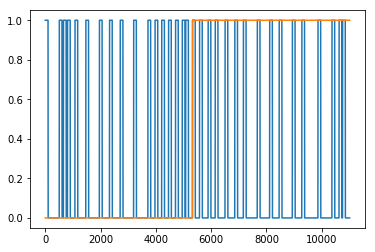

In [15]:
# plt.plot(meta['learning_state'].isin(['learning']).values)
# fboo = cas.tca._first100_bool_wdelta(meta)
plt.plot(firstboo)
# plt.plot(meta.reset_index()['date'].values-np.max(meta.reset_index()['date'].values))
plt.plot(meta['learning_state'].isin(['reversal1']).values)
meta['learning_state'].isin(['reversal1']).values

In [16]:
indy = np.where(meta['learning_state'].isin(['reversal1']).values)[0][0]
meta['learning_state'].iloc[indy-10:indy+10]

mouse  date    run  trial_idx
OA26   170319  2    139           learning
                    140           learning
                    141           learning
                    142           learning
                    144           learning
                    145           learning
                    146           learning
                    148           learning
                    149           learning
                    151           learning
               3    17           reversal1
                    18           reversal1
                    21           reversal1
                    22           reversal1
                    23           reversal1
                    24           reversal1
                    28           reversal1
                    29           reversal1
                    30           reversal1
                    31           reversal1
Name: learning_state, dtype: object

In [ ]:
for mouse in ['OA34', 'VF226', 'OA67','OA32', 'OA36', 'OA26', 'CC175']:
# for mouse in ['OA27']:
    cas.plotting.tca.groupday_longform_factors_annotated(mouse, group_by='all3', word='horrible', nan_thresh=0.95, add_prev_cols=True)
    cas.plotting.tca.groupday_factors_annotated(mouse, group_by='all3', word='horrible',  nan_thresh=0.95, add_prev_cols=True)
#     cas.plotting.tca.groupday_varex_summary(mouse, method='ncp_hals', trace_type='zscore_day', group_by='high_dprime_learning', word='pepper', score_threshold=0.8, rectified=True)

In [ ]:
cas.plotting.tca.groupday_factors_annotated('OA27',
                                            method='ncp_hals', 
                                            trace_type='zscore_day', 
                                            group_by='all2', 
                                            word='brick',
                                            score_threshold=0.8,
                                           )


In [112]:
date = flow.Mouse('OA27').dates()[0].runs()
date[0]

Run(mouse='OA27', date=170116, run=2, run_type='other', tags=('kelly', 'naive', 'orientation_mapping', 'xday'))

In [142]:
date = flow.Mouse('OA27').dates()[0]
cs=['0', '135', '270']
integrate_bins=10
ncses=3
baselines = np.nanmean(pool.stimulus.trials(date, cs, start_s=-1, end_s=0), axis=1)
stimuli = pool.stimulus.trials(date, cs, start_s=0, end_relative=2)
stimuli2 = pool.stimulus.trials(date, cs, start_s=-1, end_relative=2)
# stimuli2 = pool.stimulus.trials(date, cs, start_s=0, end_relative=2)
fintegrate = -(-np.shape(stimuli)[1]//integrate_bins)  # ceiling division



# Per-cell value
meanbl = np.nanmean(baselines, axis=1)
ncells = np.shape(baselines)[0]

# We will save the maximum inverse p values
maxinvps = np.zeros(ncells, dtype=np.float64)
maxinvps2 = np.zeros(ncells, dtype=np.float64)
bonferroni_n = ncells*ncses*integrate_bins

for i in range(integrate_bins):
    trs = np.nanmean(stimuli[:, i*fintegrate:(i+1)*fintegrate, :], axis=1)

    for c in range(ncells):
        if np.nanmean(trs[c, :]) > meanbl[c]:
            pv = stats.ranksums(baselines[c, :], trs[c, :]).pvalue
            logpv = -1*np.log10(pv*bonferroni_n)
            if logpv > maxinvps[c]:
                maxinvps[c] = logpv
                
for i in range(integrate_bins):
    trs = np.nanmean(stimuli[:, i*fintegrate:(i+1)*fintegrate, :], axis=1)

    for c in range(ncells):
        pv = stats.ranksums(baselines[c, :], trs[c, :]).pvalue
        logpv = -1*np.log10(pv*bonferroni_n)
        if logpv > maxinvps2[c]:
            maxinvps2[c] = logpv

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: Mean of empty slice


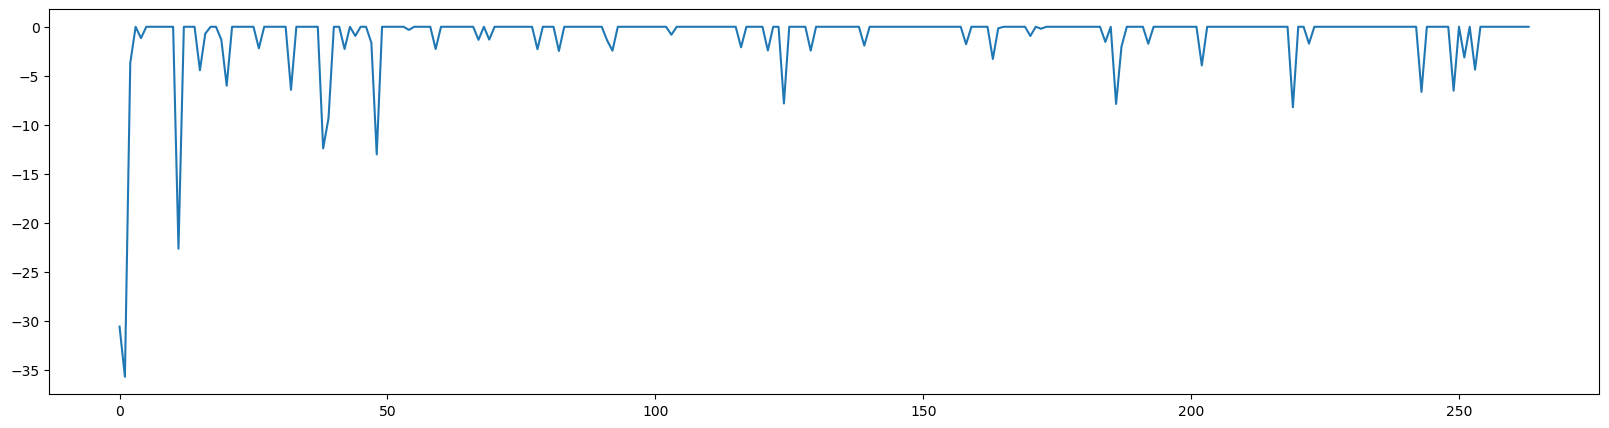

In [137]:
plt.figure(figsize=(20, 5))
plt.plot(maxinvps - maxinvps2)
# plt.plot(maxinvps2)

In [ ]:
plt.figure(figsize=(5, 15))
# sns.heatmap(np.nanmean(stimuli[:,:,:], axis=2)-meanbl[:, None] < -0.02)
sns.heatmap(np.nanmean(stimuli2[:,:,:], axis=2), vmin=0, cmap='RdBu_r', center=0)
plt.plot(maxinvps2 - maxinvps, np.arange(len(maxinvps)))
plt.plot(maxinvps2, np.arange(len(maxinvps)))

In [ ]:
# celln = 15
for celln in range(25, 35):
    fig, axes = plt.subplots(1,2, figsize=(10,10))
    sns.heatmap(stimuli[celln,:,:].T, ax=axes[0])
    axes[0].set_title(f'Cell {celln}: ABS')
    sns.heatmap(stimuli2[celln,:,:].T, ax=axes[1])
    axes[1].set_title(f'Cell {celln}: normal')

Mice hashed: counted


s:\twophoton_analysis\code\cascade\cascade\plotting\tca.py:240: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(s, 2) for s in ax.get_yticks()], size=14)


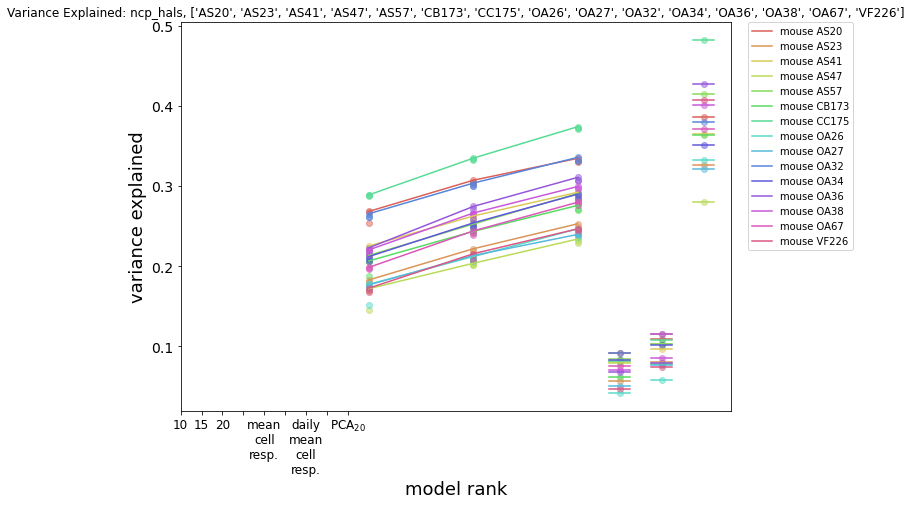

In [3]:
# words = ['bookmarks' if m == 'OA27' else 'horrible' for m in cas.lookups.mice['all13']]
words = ['carter' if m == 'OA27' else 'desperate' for m in cas.lookups.mice['all15']]
cas.plotting.tca.groupmouse_varex_summary(
#         mice=['OA27', 'OA67', 'OA32', 'OA34', 'OA36', 'OA26', 'VF226', 'CC175'],
        mice = cas.lookups.mice['all15'],
#         words = ['facilitate'] * len(cas.lookups.mice['all13']),
        words=words,
        trace_type='zscore_day',
        method='ncp_hals',
        cs='',
        warp=False,
#         words=['christina']*7,
#         words=['directors', 'appeared', 'appeared',
#                'appeared', 'appeared', 'appeared', 'appeared'],
#         words=['determine', 'pharmacology', 'pharmacology',
#                'pharmacology', 'pharmacology', 'pharmacology', 'pharmacology'],
#         words=['bookmarks', 'horrible', 'horrible',
#                'horrible', 'horrible', 'horrible', 'horrible', 'horrible', 'horrible',
#                'horrible', 'horrible', 'horrible', 'horrible', 'horrible', 'horrible'],
        group_by='all3',
        nan_thresh=0.95,
        score_threshold=0.8,
        add_dropout_line=False,
        rectified=False,
        verbose=False)

In [ ]:
%load_ext autoreload
%autoreload 2
import cascade as cas
import flow
import pool

# parameters
drive_threshold = 1.31 # usually 1.31 for significance
sc = 0.8
nant = 0.95  #0.95
gb = 'all3'  # TESTING THIS TO GET PAVS FOR MISMATCH
tt='zscore_day'
method='ncp_hals'
rank= 20 #[10, 15, 20]  #usually 20
ww = False
cv = False
negative_modes =[] #[1]
smooth = True
# exclude_conds=('blank_reward', 'blank', 'pavlovian') # This is the wrong order being used to generate a unique hash
exclude_conds=('blank', 'blank_reward', 'pavlovian')
clean_artifacts = None

update_meta = True

for mouse in ['LM26']:
# for mouse in cas.lookups.mice['l5']:
#     try:
    
#     wd = 'carter' if mouse in 'OA27' else 'desperate'

    cas.tca.groupday_tca(
        mouse,
        tags=None,

        # TCA params
        rank=rank,
        method=(method,),
        replicates=3,
        fit_options=None,
        negative_modes = negative_modes,

        # grouping params
        group_by=gb,
        up_or_down='up',
        use_dprime=False,
        dprime_threshold=2,

        # tensor params
        trace_type=tt,
        cs='',
        downsample=True,
        start_time=-1,
        end_time=6,
        clean_artifacts=clean_artifacts,
        thresh=20,
        warp=ww,
        smooth=smooth, #True
        smooth_win=6,
        verbose=True,

        # filtering params
        exclude_tags=('disengaged', 'orientation_mapping', 'contrast', 'retinotopy', 'sated'),
        exclude_conds=exclude_conds,
        driven=True,
        drive_css=('0', '135', '270'),
        drive_threshold=drive_threshold, #3 for logn, #1.31
        drive_type='trial',
        nan_trial_threshold=nant, #0.95
        score_threshold=sc,

        # other params
        update_meta=update_meta,
        three_pt_tf=False,
        remove_stim_corr=False,
        cv=cv,
        )                                          

#     cas.plotting.tca.groupday_factors_annotated(mouse, warp=ww, nan_thresh=nant, method=method, trace_type=tt,
#                                                 group_by=gb, word=wd, score_threshold=sc, add_prev_cols=False, cv=cv,
#                                                negative_modes=negative_modes)
#     cas.plotting.tca.groupday_longform_factors_annotated(mouse, warp=ww, nan_thresh=nant, method=method, trace_type=tt, cv=cv,
#                                                          group_by=gb, word=wd, score_threshold=sc, 
#                                                         negative_modes=negative_modes)
#     if cv:
#         cas.plotting.tca.groupday_varex_summary_cv(mouse, warp=ww, nan_thresh=nant, method=method, trace_type=tt,
#                                             group_by=gb, word=wd, score_threshold=sc, rectified=True if len(negative_modes) == 0 else False)
#     else:
#         cas.plotting.tca.groupday_varex_summary(mouse, warp=ww, nan_thresh=nant, method=method, trace_type=tt,
#                                         group_by=gb, word=wd, score_threshold=sc, rectified=True if len(negative_modes) == 0 else False)
#     except:
#         print('nope {}'.format(mouse))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
LM26: TCA parameters hashed: computation
Recalcing pool.calc.driven.trial: LM26 170207 
Recalcing pool.calc.driven.trial: LM26 170207 
Recalcing pool.calc.driven.trial: LM26 170207 
Recalcing pool.calc.driven.trial: LM26 170226 
Recalcing pool.calc.driven.trial: LM26 170226 
Recalcing pool.calc.driven.trial: LM26 170226 
Recalcing pool.calc.driven.trial: LM26 170311 
Recalcing pool.calc.driven.trial: LM26 170311 
Recalcing pool.calc.driven.trial: LM26 170311 
Recalcing pool.calc.driven.trial: LM26 170408 
Recalcing pool.calc.driven.trial: LM26 170408 
Recalcing pool.calc.driven.trial: LM26 170408 
Recalcing pool.calc.driven.trial: LM26 170417 
Recalcing pool.calc.driven.trial: LM26 170417 
Recalcing pool.calc.driven.trial: LM26 170417 
Cell score threshold 0.8: 498 above threshold: good_ids updated to 240/261 cells.
Recalcing pool.calc.zscore.mu: LM26 170207 
Recalcing pool.calc.zscore.sigma: LM26 1

In [11]:
debug

> s:\twophoton_analysis\code\pool\pool\calc\driven.py(256)trial()
    254 
    255     # Baseline is mean across frames, now ncells x nonsets
--> 256     baselines = nanmean(stimulus.trials(date, cs, start_s=-1, end_s=0), axis=1)
    257     stimuli = stimulus.trials(date, cs, start_s=0, end_relative=2)
    258     fintegrate = -(-np.shape(stimuli)[1]//integrate_bins)  # ceiling division



ipdb>  u


> s:\twophoton_analysis\code\pool\pool\database.py(209)memoizer()
    207 
    208                 self.db.pre_calc(analysis_name)
--> 209                 out = fn(**parsed_kwargs)
    210                 depends_on = self.db.post_calc(
    211                     analysis_name, self.updated)



ipdb>  u


> s:\twophoton_analysis\code\cascade\cascade\tca.py(1799)_group_drive_ids()
   1797                 if drive_type.lower() == 'trial':
   1798                     d1_drive.append(
-> 1799                         pool.calc.driven.trial(day1, dcs))
   1800                 elif drive_type.lower() == 'trial_abs':
   1801                     d1_drive.append(



ipdb>  day1


Date(mouse='PD27', date=170119, tags=('kelly', 'naive', 'orientation_mapping', 'xday'), photometry=())


ipdb>  quit


Updated naive cs-ori pairings to match learning.
     135 plus
     270 minus
     0 neutral
Updated naive trialerror to match learning.
Mice hashed: counted
Updated naive cs-ori pairings to match learning.
     0 plus
     270 minus
     135 neutral
Updated naive trialerror to match learning.
Mice hashed: counted
Updated naive cs-ori pairings to match learning.
     270 plus
     0 minus
     135 neutral
Updated naive trialerror to match learning.
Mice hashed: counted
Updated naive cs-ori pairings to match learning.
     135 plus
     0 minus
     270 neutral
Updated naive trialerror to match learning.
Mice hashed: counted
Updated naive cs-ori pairings to match learning.
     0 plus
     270 minus
     135 neutral
Updated naive trialerror to match learning.
Mice hashed: counted
Updated naive cs-ori pairings to match learning.
     0 plus
     270 minus
     135 neutral
Updated naive trialerror to match learning.
Mice hashed: counted
Updated naive cs-ori pairings to match learning.
   

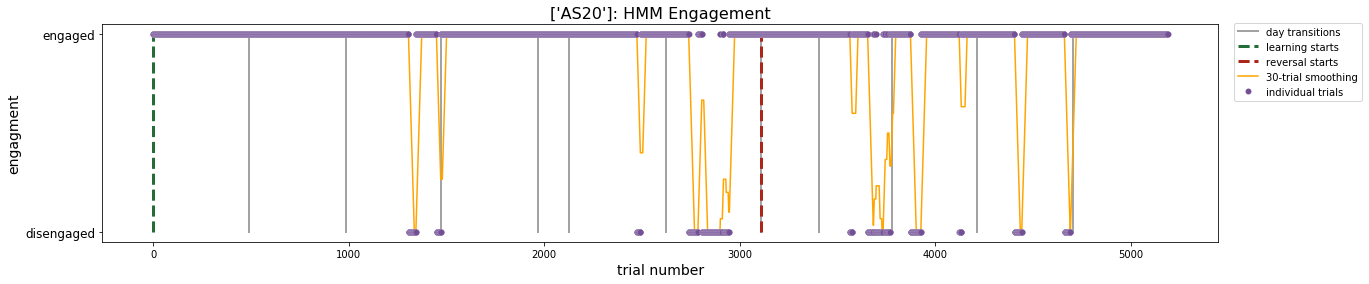

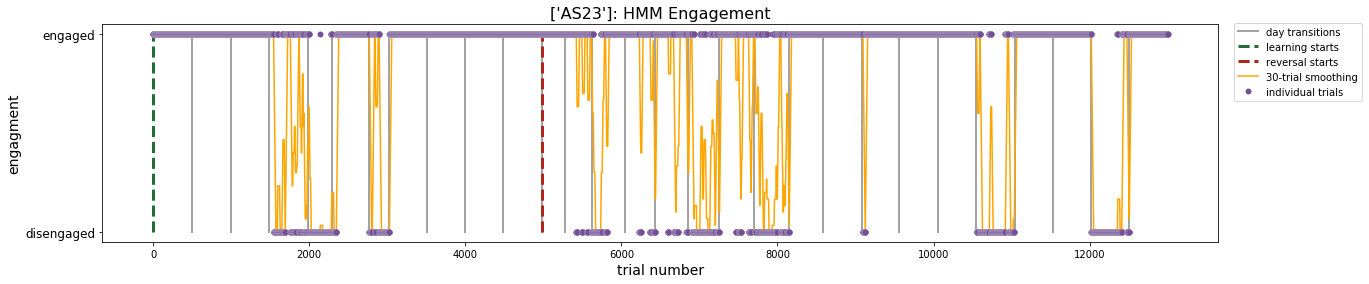

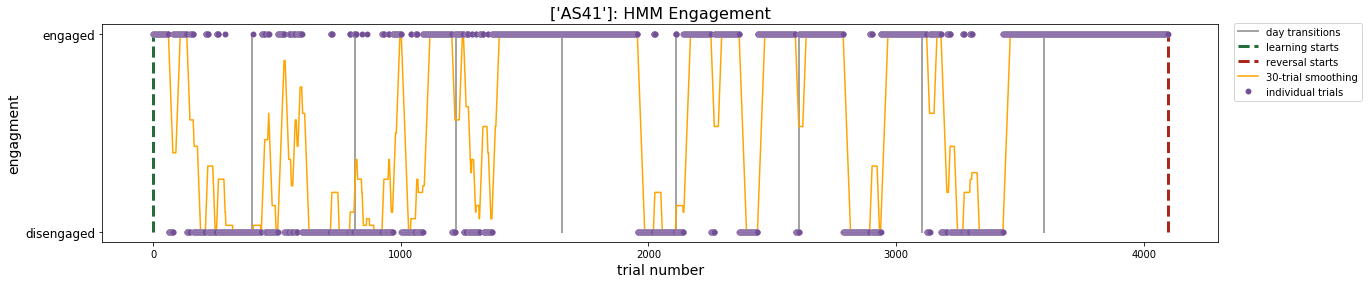

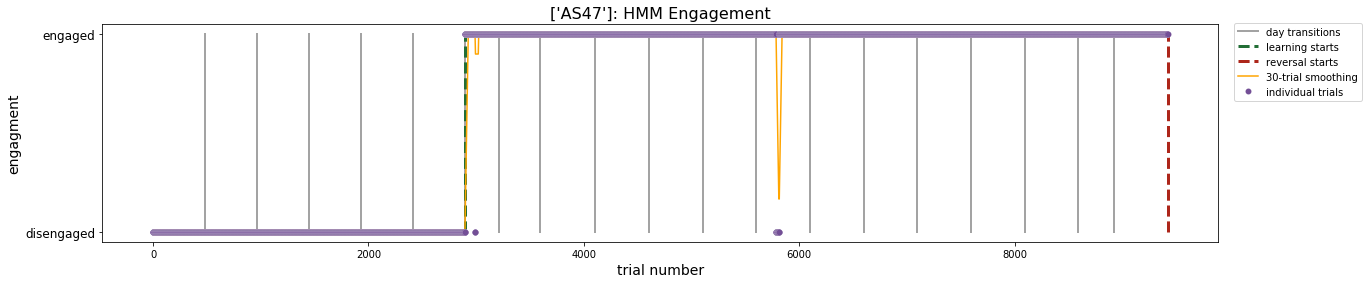

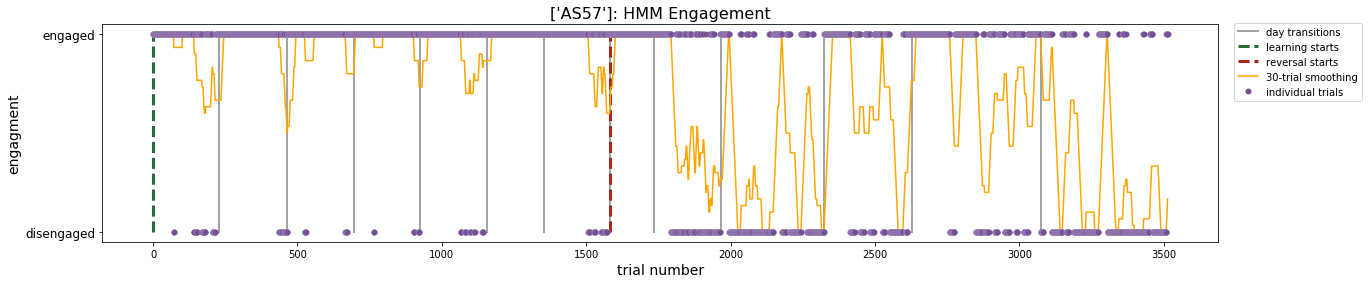

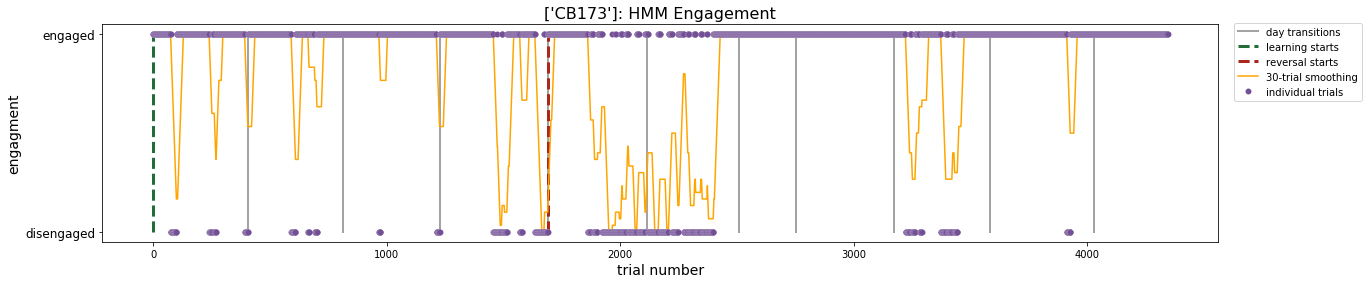

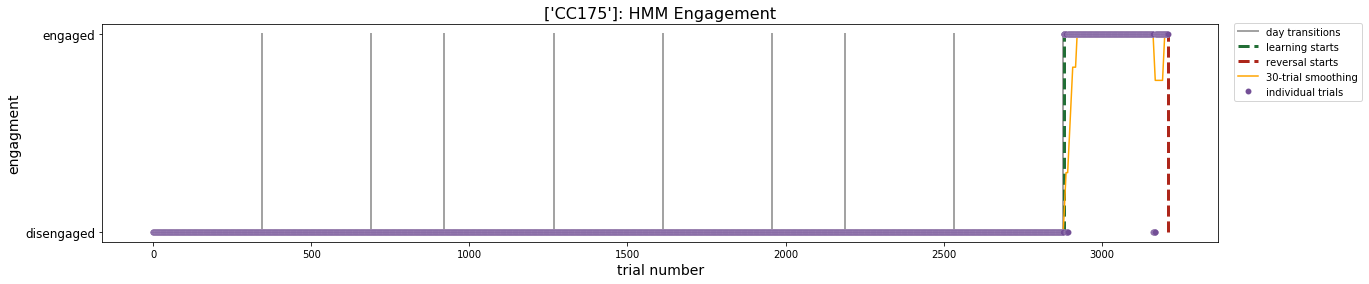

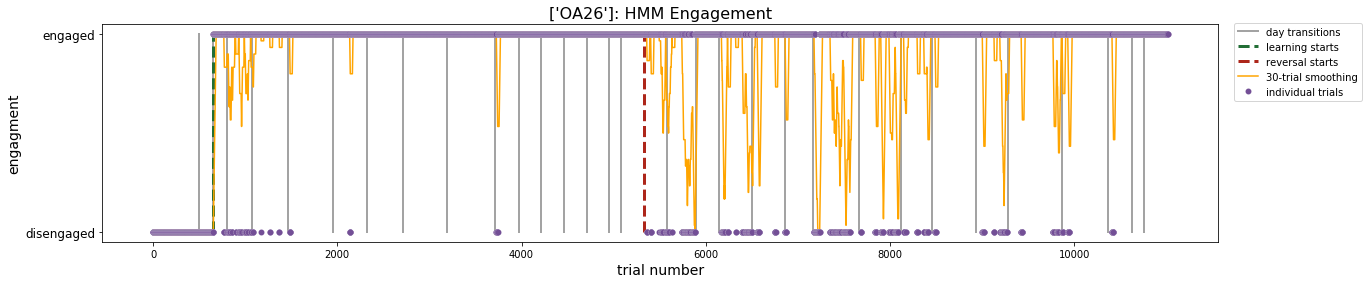

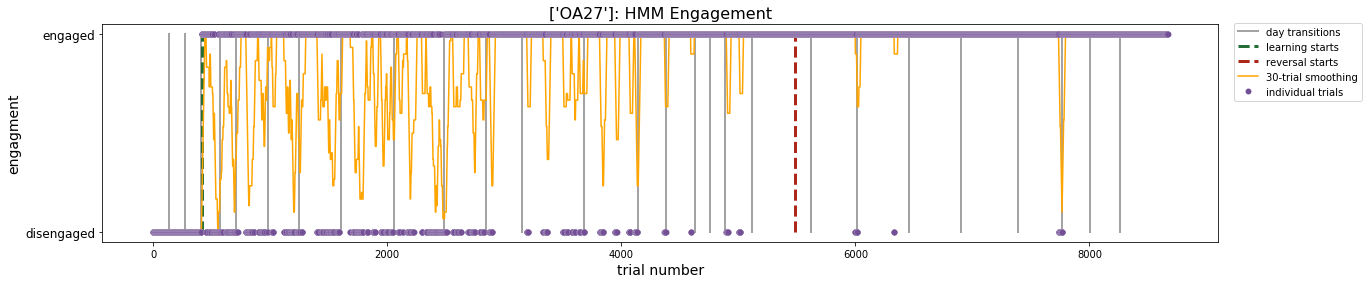

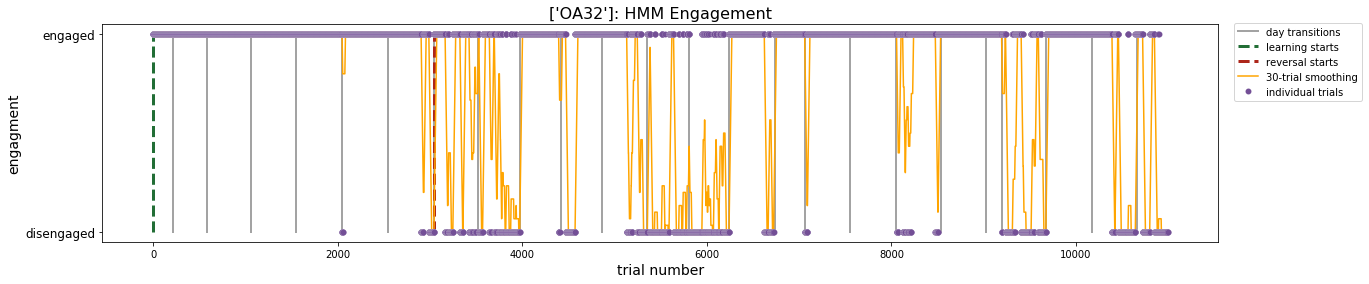

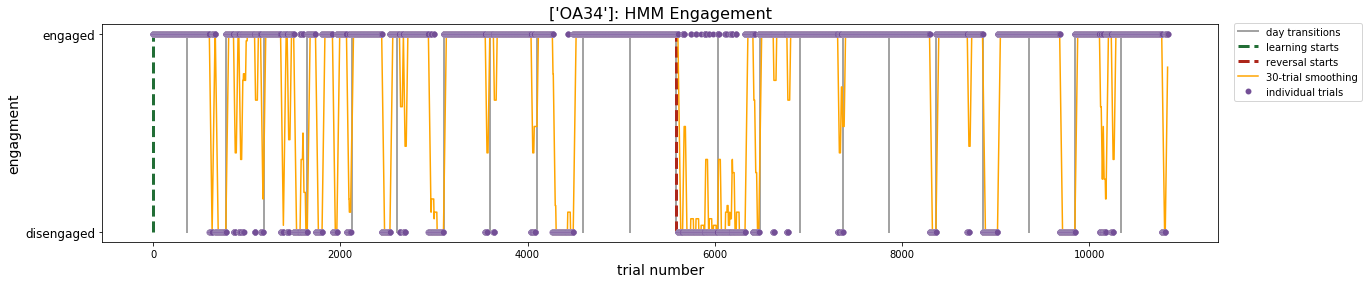

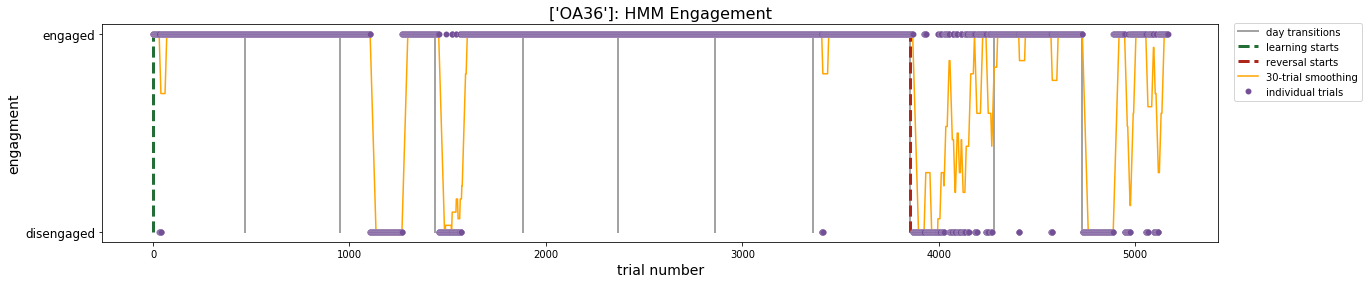

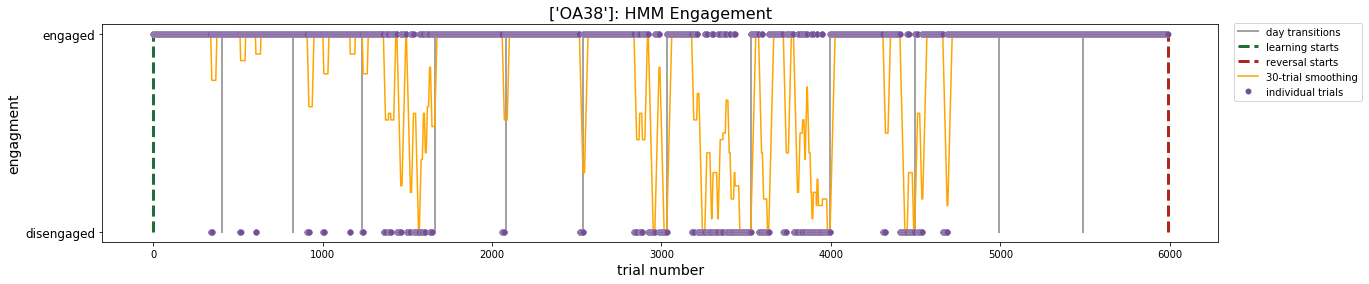

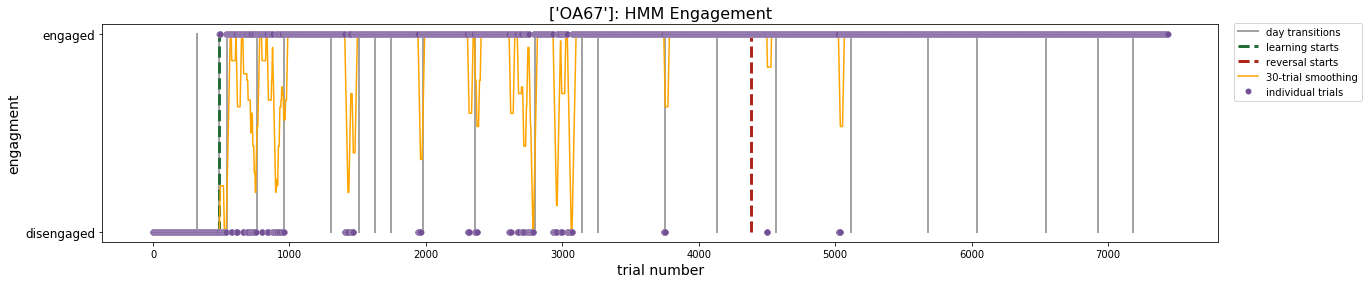

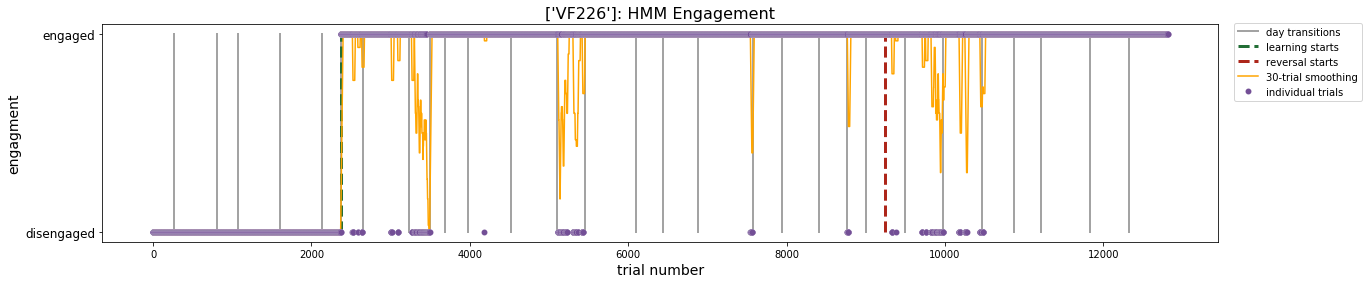

In [10]:
mice = cas.lookups.mice['all15']
words = ['bookmarks' if m == 'OA27' else 'horrible' for m in mice]
cas.plotting.behavior.hmm_summary_groupmouse(mice, words)

In [92]:
sp.spatial.distance.cosine([1, 0], [0.85, 1])

0.35235157990445953

In [ ]:
mice = cas.lookups.mice['all15']
# words = ['bookmarks' if m == 'OA27' else 'horrible' for m in mice]
words = ['facilitate'] * len(mice)
rank = 10

# for mouse, word in zip(mice, words):
test = cas.adaptation.calc_daily_ramp(
        mice,
        words=words,
        method='ncp_hals',
        cs='',
        warp=False,
        trace_type='zscore_day',
        group_by='learning',
        nan_thresh=0.95,
        score_threshold=0.8,
        rank=rank,
        annotate=True)
plt.close('all')


In [3]:
mice = cas.lookups.mice['all15']
# words = ['bookmarks' if m == 'OA27' else 'horrible' for m in mice]
words = ['facilitate'] * len(mice)
rank = 15

# for mouse, word in zip(mice, words):
test = cas.adaptation.calc_daily_transientness(
        mice,
        words=words,
        method='ncp_hals',
        cs='',
        warp=False,
        trace_type='zscore_day',
        group_by='learning',
        nan_thresh=0.95,
        score_threshold=0.8,
        rank=rank,
        annotate=True,
        over_components=False,
        project=True)
plt.close('all')

Updated naive cs-ori pairings to match learning.
     135 plus
     270 minus
     0 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     135 plus
     270 minus
     0 neutral
Updated naive trialerror to match learning.
!!!!! AS20 temporal projection signals/answered missing cells. 396/605 will be kept.
Mice hashed: counted


s:\twophoton_analysis\code\cascade\cascade\adaptation.py:449: RuntimeWarning: All-NaN slice encountered
  above_thresh = ~np.isnan(np.nanmax(weights, axis=1))
s:\twophoton_analysis\code\cascade\cascade\utils.py:43: RuntimeWarning: Mean of empty slice
  new_tensor[:, :, c] = np.nanmean(ablated_tensor[:, :, day_boo & cue_bool], axis=2)
s:\twophoton_analysis\code\cascade\cascade\utils.py:75: RuntimeWarning: Mean of empty slice
  new_mat = np.nanmean(ablated_tensor[:, stim_bool, :], axis=1)


Updated naive cs-ori pairings to match learning.
     0 plus
     270 minus
     135 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     0 plus
     270 minus
     135 neutral
Updated naive trialerror to match learning.
!!!!! AS23 temporal projection signals/answered missing cells. 319/573 will be kept.
Mice hashed: counted


s:\twophoton_analysis\code\cascade\cascade\adaptation.py:449: RuntimeWarning: All-NaN slice encountered
  above_thresh = ~np.isnan(np.nanmax(weights, axis=1))
s:\twophoton_analysis\code\cascade\cascade\utils.py:43: RuntimeWarning: Mean of empty slice
  new_tensor[:, :, c] = np.nanmean(ablated_tensor[:, :, day_boo & cue_bool], axis=2)
s:\twophoton_analysis\code\cascade\cascade\utils.py:75: RuntimeWarning: Mean of empty slice
  new_mat = np.nanmean(ablated_tensor[:, stim_bool, :], axis=1)


Updated naive cs-ori pairings to match learning.
     270 plus
     0 minus
     135 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     270 plus
     0 minus
     135 neutral
Updated naive trialerror to match learning.
!!!!! AS41 temporal projection signals/answered missing cells. 356/704 will be kept.
Mice hashed: counted


s:\twophoton_analysis\code\cascade\cascade\adaptation.py:449: RuntimeWarning: All-NaN slice encountered
  above_thresh = ~np.isnan(np.nanmax(weights, axis=1))
s:\twophoton_analysis\code\cascade\cascade\utils.py:43: RuntimeWarning: Mean of empty slice
  new_tensor[:, :, c] = np.nanmean(ablated_tensor[:, :, day_boo & cue_bool], axis=2)
s:\twophoton_analysis\code\cascade\cascade\utils.py:75: RuntimeWarning: Mean of empty slice
  new_mat = np.nanmean(ablated_tensor[:, stim_bool, :], axis=1)


Updated naive cs-ori pairings to match learning.
     135 plus
     0 minus
     270 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     135 plus
     0 minus
     270 neutral
Updated naive trialerror to match learning.
!!!!! AS47 temporal projection signals/answered missing cells. 505/722 will be kept.
Mice hashed: counted


s:\twophoton_analysis\code\cascade\cascade\adaptation.py:449: RuntimeWarning: All-NaN slice encountered
  above_thresh = ~np.isnan(np.nanmax(weights, axis=1))
s:\twophoton_analysis\code\cascade\cascade\utils.py:43: RuntimeWarning: Mean of empty slice
  new_tensor[:, :, c] = np.nanmean(ablated_tensor[:, :, day_boo & cue_bool], axis=2)
s:\twophoton_analysis\code\cascade\cascade\utils.py:75: RuntimeWarning: Mean of empty slice
  new_mat = np.nanmean(ablated_tensor[:, stim_bool, :], axis=1)


Updated naive cs-ori pairings to match learning.
     0 plus
     270 minus
     135 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     0 plus
     270 minus
     135 neutral
Updated naive trialerror to match learning.
!!!!! AS57 temporal projection signals/answered missing cells. 182/352 will be kept.
Mice hashed: counted


s:\twophoton_analysis\code\cascade\cascade\adaptation.py:449: RuntimeWarning: All-NaN slice encountered
  above_thresh = ~np.isnan(np.nanmax(weights, axis=1))
s:\twophoton_analysis\code\cascade\cascade\utils.py:43: RuntimeWarning: Mean of empty slice
  new_tensor[:, :, c] = np.nanmean(ablated_tensor[:, :, day_boo & cue_bool], axis=2)
s:\twophoton_analysis\code\cascade\cascade\utils.py:75: RuntimeWarning: Mean of empty slice
  new_mat = np.nanmean(ablated_tensor[:, stim_bool, :], axis=1)


Updated naive cs-ori pairings to match learning.
     0 plus
     270 minus
     135 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     0 plus
     270 minus
     135 neutral
Updated naive trialerror to match learning.
!!!!! CB173 temporal projection signals/answered missing cells. 267/371 will be kept.
Mice hashed: counted


s:\twophoton_analysis\code\cascade\cascade\adaptation.py:449: RuntimeWarning: All-NaN slice encountered
  above_thresh = ~np.isnan(np.nanmax(weights, axis=1))
s:\twophoton_analysis\code\cascade\cascade\utils.py:43: RuntimeWarning: Mean of empty slice
  new_tensor[:, :, c] = np.nanmean(ablated_tensor[:, :, day_boo & cue_bool], axis=2)
s:\twophoton_analysis\code\cascade\cascade\utils.py:75: RuntimeWarning: Mean of empty slice
  new_mat = np.nanmean(ablated_tensor[:, stim_bool, :], axis=1)


Updated naive cs-ori pairings to match learning.
     0 plus
     270 minus
     135 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     0 plus
     270 minus
     135 neutral
Updated naive trialerror to match learning.
!!!!! CC175 temporal projection signals/answered missing cells. 77/122 will be kept.
Mice hashed: counted


s:\twophoton_analysis\code\cascade\cascade\adaptation.py:449: RuntimeWarning: All-NaN slice encountered
  above_thresh = ~np.isnan(np.nanmax(weights, axis=1))
s:\twophoton_analysis\code\cascade\cascade\utils.py:43: RuntimeWarning: Mean of empty slice
  new_tensor[:, :, c] = np.nanmean(ablated_tensor[:, :, day_boo & cue_bool], axis=2)
s:\twophoton_analysis\code\cascade\cascade\utils.py:75: RuntimeWarning: Mean of empty slice
  new_mat = np.nanmean(ablated_tensor[:, stim_bool, :], axis=1)


Updated naive cs-ori pairings to match learning.
     270 plus
     135 minus
     0 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     270 plus
     135 minus
     0 neutral
Updated naive trialerror to match learning.
!!!!! OA26 temporal projection signals/answered missing cells. 597/923 will be kept.
Mice hashed: counted


s:\twophoton_analysis\code\cascade\cascade\adaptation.py:449: RuntimeWarning: All-NaN slice encountered
  above_thresh = ~np.isnan(np.nanmax(weights, axis=1))
s:\twophoton_analysis\code\cascade\cascade\utils.py:43: RuntimeWarning: Mean of empty slice
  new_tensor[:, :, c] = np.nanmean(ablated_tensor[:, :, day_boo & cue_bool], axis=2)
s:\twophoton_analysis\code\cascade\cascade\utils.py:75: RuntimeWarning: Mean of empty slice
  new_mat = np.nanmean(ablated_tensor[:, stim_bool, :], axis=1)


Updated naive cs-ori pairings to match learning.
     270 plus
     135 minus
     0 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     270 plus
     135 minus
     0 neutral
Updated naive trialerror to match learning.
!!!!! OA27 temporal projection signals/answered missing cells. 502/748 will be kept.
Mice hashed: counted


s:\twophoton_analysis\code\cascade\cascade\adaptation.py:449: RuntimeWarning: All-NaN slice encountered
  above_thresh = ~np.isnan(np.nanmax(weights, axis=1))
s:\twophoton_analysis\code\cascade\cascade\utils.py:43: RuntimeWarning: Mean of empty slice
  new_tensor[:, :, c] = np.nanmean(ablated_tensor[:, :, day_boo & cue_bool], axis=2)
s:\twophoton_analysis\code\cascade\cascade\utils.py:75: RuntimeWarning: Mean of empty slice
  new_mat = np.nanmean(ablated_tensor[:, stim_bool, :], axis=1)


Updated naive cs-ori pairings to match learning.
     135 plus
     0 minus
     270 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     135 plus
     0 minus
     270 neutral
Updated naive trialerror to match learning.
!!!!! OA32 temporal projection signals/answered missing cells. 323/446 will be kept.
Mice hashed: counted


s:\twophoton_analysis\code\cascade\cascade\adaptation.py:449: RuntimeWarning: All-NaN slice encountered
  above_thresh = ~np.isnan(np.nanmax(weights, axis=1))
s:\twophoton_analysis\code\cascade\cascade\utils.py:43: RuntimeWarning: Mean of empty slice
  new_tensor[:, :, c] = np.nanmean(ablated_tensor[:, :, day_boo & cue_bool], axis=2)
s:\twophoton_analysis\code\cascade\cascade\utils.py:75: RuntimeWarning: Mean of empty slice
  new_mat = np.nanmean(ablated_tensor[:, stim_bool, :], axis=1)


Updated naive cs-ori pairings to match learning.
     270 plus
     135 minus
     0 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     270 plus
     135 minus
     0 neutral
Updated naive trialerror to match learning.
!!!!! OA34 temporal projection signals/answered missing cells. 360/634 will be kept.
Mice hashed: counted


s:\twophoton_analysis\code\cascade\cascade\adaptation.py:449: RuntimeWarning: All-NaN slice encountered
  above_thresh = ~np.isnan(np.nanmax(weights, axis=1))
s:\twophoton_analysis\code\cascade\cascade\utils.py:43: RuntimeWarning: Mean of empty slice
  new_tensor[:, :, c] = np.nanmean(ablated_tensor[:, :, day_boo & cue_bool], axis=2)
s:\twophoton_analysis\code\cascade\cascade\utils.py:75: RuntimeWarning: Mean of empty slice
  new_mat = np.nanmean(ablated_tensor[:, stim_bool, :], axis=1)


Updated naive cs-ori pairings to match learning.
     0 plus
     270 minus
     135 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     0 plus
     270 minus
     135 neutral
Updated naive trialerror to match learning.
!!!!! OA36 temporal projection signals/answered missing cells. 285/511 will be kept.
Mice hashed: counted


s:\twophoton_analysis\code\cascade\cascade\adaptation.py:449: RuntimeWarning: All-NaN slice encountered
  above_thresh = ~np.isnan(np.nanmax(weights, axis=1))
s:\twophoton_analysis\code\cascade\cascade\utils.py:43: RuntimeWarning: Mean of empty slice
  new_tensor[:, :, c] = np.nanmean(ablated_tensor[:, :, day_boo & cue_bool], axis=2)
s:\twophoton_analysis\code\cascade\cascade\utils.py:75: RuntimeWarning: Mean of empty slice
  new_mat = np.nanmean(ablated_tensor[:, stim_bool, :], axis=1)


Updated naive cs-ori pairings to match learning.
     135 plus
     0 minus
     270 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     135 plus
     0 minus
     270 neutral
Updated naive trialerror to match learning.
!!!!! OA38 temporal projection signals/answered missing cells. 309/766 will be kept.
Mice hashed: counted


s:\twophoton_analysis\code\cascade\cascade\adaptation.py:449: RuntimeWarning: All-NaN slice encountered
  above_thresh = ~np.isnan(np.nanmax(weights, axis=1))
s:\twophoton_analysis\code\cascade\cascade\utils.py:43: RuntimeWarning: Mean of empty slice
  new_tensor[:, :, c] = np.nanmean(ablated_tensor[:, :, day_boo & cue_bool], axis=2)
s:\twophoton_analysis\code\cascade\cascade\utils.py:75: RuntimeWarning: Mean of empty slice
  new_mat = np.nanmean(ablated_tensor[:, stim_bool, :], axis=1)


Updated naive cs-ori pairings to match learning.
     0 plus
     270 minus
     135 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     0 plus
     270 minus
     135 neutral
Updated naive trialerror to match learning.
!!!!! OA67 temporal projection signals/answered missing cells. 380/579 will be kept.
Mice hashed: counted


s:\twophoton_analysis\code\cascade\cascade\adaptation.py:449: RuntimeWarning: All-NaN slice encountered
  above_thresh = ~np.isnan(np.nanmax(weights, axis=1))
s:\twophoton_analysis\code\cascade\cascade\utils.py:43: RuntimeWarning: Mean of empty slice
  new_tensor[:, :, c] = np.nanmean(ablated_tensor[:, :, day_boo & cue_bool], axis=2)
s:\twophoton_analysis\code\cascade\cascade\utils.py:75: RuntimeWarning: Mean of empty slice
  new_mat = np.nanmean(ablated_tensor[:, stim_bool, :], axis=1)


Updated naive cs-ori pairings to match learning.
     0 plus
     270 minus
     135 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     0 plus
     270 minus
     135 neutral
Updated naive trialerror to match learning.
!!!!! VF226 temporal projection signals/answered missing cells. 259/417 will be kept.
Mice hashed: counted


s:\twophoton_analysis\code\cascade\cascade\adaptation.py:449: RuntimeWarning: All-NaN slice encountered
  above_thresh = ~np.isnan(np.nanmax(weights, axis=1))
s:\twophoton_analysis\code\cascade\cascade\utils.py:43: RuntimeWarning: Mean of empty slice
  new_tensor[:, :, c] = np.nanmean(ablated_tensor[:, :, day_boo & cue_bool], axis=2)
s:\twophoton_analysis\code\cascade\cascade\utils.py:75: RuntimeWarning: Mean of empty slice
  new_mat = np.nanmean(ablated_tensor[:, stim_bool, :], axis=1)


In [3]:
mice = cas.lookups.mice['all12']
words = ['respondent' if s in 'OA27' else 'computation' for s in mice]

trans_df_cells = cas.plotting.adaptation.plot_transientness_scatter_stages(mice,
        words=words,
        method='ncp_hals',
        cs='',
        warp=False,
        trace_type='zscore_day',
        group_by='all3',
        nan_thresh=0.95,
        score_threshold=0.8,
        rank=15,
        staging='parsed_11stage',
        bin_range='all3',
        project=True)

Mice hashed: camp


AssertionError: 

In [4]:
debug

> s:\twophoton_analysis\code\cascade\cascade\plotting\adaptation.py(111)plot_transientness_scatter_stages()
    109     comp_or_cell = 'cell'
    110     save_folder = save_path + f' day transient {comp_or_cell} rank {rank}'
--> 111     assert os.path.isdir(save_folder)
    112     adapt_df = pd.read_pickle(
    113         os.path.join(save_folder, f'TCA_daily_transientness_r{rank}_{comp_or_cell}.pkl'))



ipdb>  save_folder


'S:\\twophoton_analysis\\Data\\analysis\\Group-camp\\tensors-group-zscore_day-all3-computation\\trans_projection score 0.8 nantrial 0.95\\all3 ncp_hals day transient cell rank 15'


ipdb>  q


In [16]:
model, ids, tensor, meta, bhv, sorts = cas.load.load_all_groupday(
        mouse='CC175',
        trace_type='deconvolved_bin_cap',
        method='ncp_hals',
        cs='',
        warp=False,
        word='maker',
        rank=15,
        group_by='all3',
        nan_thresh=0.95,
        score_threshold=0.8,
        full_output=False,
        unsorted=True,
        with_model=True,
        verbose=True)

CC175: maker: Re-balancing factors.
CC175: maker: Re-nonneg-ing cell factors.
Updated naive cs-ori pairings to match learning.
     0 plus
     270 minus
     135 neutral
Updated naive trialerror to match learning.


In [30]:
model, ids, tensor2, meta, bhv, sorts = cas.load.load_all_groupday(
        mouse='CC175',
        trace_type='deconvolved_cap',
        method='ncp_hals',
        cs='',
        warp=False,
        word='tough',
        rank=15,
        group_by='all3',
        nan_thresh=0.95,
        score_threshold=0.8,
        full_output=False,
        unsorted=True,
        with_model=True,
        verbose=True)

CC175: tough: Re-balancing factors.
CC175: tough: Re-nonneg-ing cell factors.
Updated naive cs-ori pairings to match learning.
     0 plus
     270 minus
     135 neutral
Updated naive trialerror to match learning.


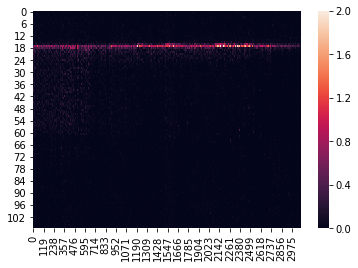

In [28]:
sns.heatmap(tensor2[4,:, :])

In [ ]:
mice = cas.lookups.mice['all15'][::-1]
words = ['facilitate'] * len(mice)
for m, w in zip(mice, words):
    ms = flow.Mouse(m)
#     try:
    df = cas.calc.var.groupday_varex_bycomp(ms, method='ncp_hals', trace_type='zscore_day',
                                          group_by='learning', word=w, nan_thresh=0.95,
                                          score_threshold=0.8, rectified=True)
    df = cas.calc.var.groupday_varex_bycomp_ablated(ms, method='ncp_hals', trace_type='zscore_day',
                                      group_by='learning', word=w, nan_thresh=0.95,
                                      score_threshold=0.8, rectified=True)
#     except:
#         print(f'\n FAILED {m} \n')

In [ ]:
debug

In [47]:
mouse='OA27'
for mouse in ['OA34', 'OA67', 'OA32', 'OA36', 'OA26', 'VF226', 'CC175']:
# for mouse in ['OA26', 'VF226', 'CC175']:
    sc = 0.8
    nant = 0.95
    wd = 'horrible'
    gb = 'all3'
    ww = False
    cas.plotting.tca.groupday_longform_factors_annotated(mouse, warp=ww, nan_thresh=nant, method='ncp_hals', trace_type='zscore_day',
                                                group_by=gb, word=wd, score_threshold=sc, add_prev_cols=True)

Updated naive cs-ori pairings to match learning.
     270 plus
     135 minus
     0 neutral
Updated naive trialerror to match learning.


In [ ]:
debug

In [25]:
color_list = ['#278a30', [0.46, 0.85, 0.47], [0.28, 0.68, 0.93], [0.84, 0.12, 0.13], '#344ceb']

In [ ]:
for mouse in ['OA26', 'VF226', 'CC175']:
#     cas.plotting.tca.groupday_factors_annotated(mouse, nan_thresh=0.95, method='ncp_hals', trace_type='zscore_day', group_by='l_vs_r1_tight', word='christina', score_threshold=0.8)
#     cas.plotting.tca.groupday_longform_factors_annotated(mouse, nan_thresh=0.95, method='ncp_hals', trace_type='zscore_day', group_by='l_vs_r1_tight', word='christina', score_threshold=0.8)
    cas.plotting.tca.groupday_varex_summary(mouse, nan_thresh=0.95, method='ncp_hals', trace_type='zscore_day', group_by='l_vs_r1_tight', word='christina', score_threshold=0.8, rectified=True)

Recalcing cascade.calc.var.groupday_varex_byday: OA67  
Updated naive cs-ori pairings to match learning.
     0 plus
     270 minus
     135 neutral
Updated naive trialerror to match learning.
Recalcing cascade.calc.var.groupday_varex_byday: OA32  
Updated naive cs-ori pairings to match learning.
     135 plus
     0 minus
     270 neutral
Updated naive trialerror to match learning.
Recalcing cascade.calc.var.groupday_varex_byday: OA34  
Updated naive cs-ori pairings to match learning.
     270 plus
     135 minus
     0 neutral
Updated naive trialerror to match learning.
Recalcing cascade.calc.var.groupday_varex_byday: OA36  
Updated naive cs-ori pairings to match learning.
     0 plus
     270 minus
     135 neutral
Updated naive trialerror to match learning.
Recalcing cascade.calc.var.groupday_varex_byday: OA26  
Updated naive cs-ori pairings to match learning.
     270 plus
     135 minus
     0 neutral
Updated naive trialerror to match learning.
Recalcing cascade.calc.var.groupday

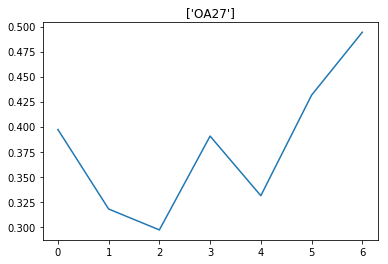

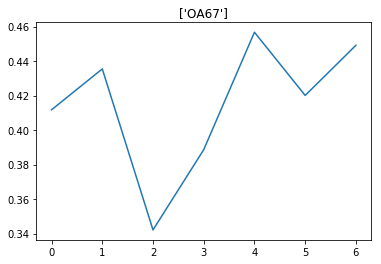

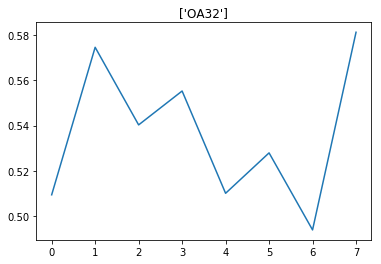

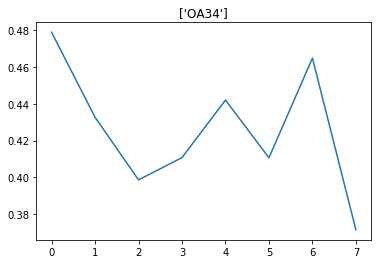

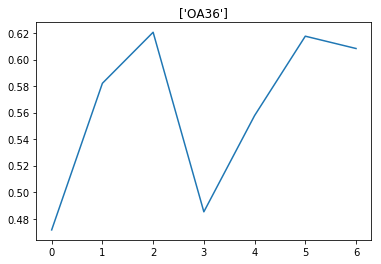

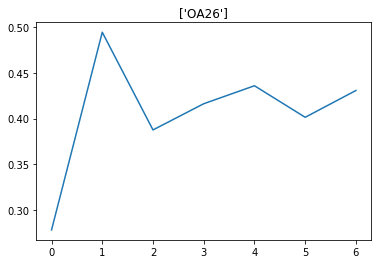

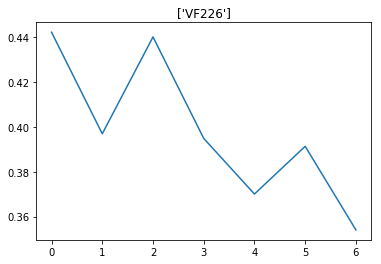

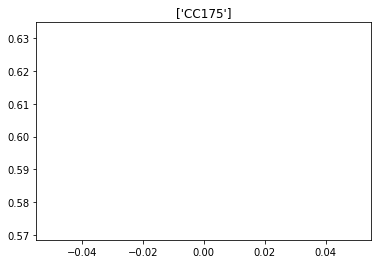

In [20]:
# ls = ['prints']
# ls.extend(['horrible']*6)
mice = ['OA27', 'OA67', 'OA32', 'OA34', 'OA36', 'OA26', 'VF226', 'CC175']
for mouse, word in zip(mice, ls):
    ms = flow.Mouse(mouse=mouse)
    df = cas.calc.var.groupday_varex_byday(ms, method='ncp_hals', trace_type='zscore_day',
                                          group_by='l_vs_r1_tight', word='christina', nan_thresh=0.95,
                                          score_threshold=0.8, rectified=True)
    plt.figure()
    plt.plot(df.loc[df['rank'].isin([20]), :]['variance_explained_tcamodel'].values)
    plt.title(df.reset_index()['mouse'].unique())

In [5]:
cas.plotting.tca.groupday_longform_factors_annotated('OA67', method='ncp_hals', trace_type='zscore_day', group_by='all2', word='pharmacology', score_threshold=0.8)
cas.plotting.tca.groupday_factors_annotated('OA67', method='ncp_hals', trace_type='zscore_day', group_by='all2', word='pharmacology', score_threshold=0.8)
cas.plotting.tca.groupday_varex_summary('OA67', method='ncp_hals', trace_type='zscore_day', group_by='all2', word='pharmacology', score_threshold=0.8, rectified=False)

Recalcing cascade.calc.var.groupday_varex: OA27  
Recalcing cascade.calc.var.groupday_varex_drop_worst_comp: OA27  


In [21]:
cas.plotting.tca.groupday_factors_annotated('CC175', method='ncp_hals', trace_type='zscore_day', group_by='all100', word='horrible', score_threshold=0.8)
cas.plotting.tca.groupday_longform_factors_annotated('CC175', method='ncp_hals', trace_type='zscore_day', group_by='all100', word='horrible', score_threshold=0.8)

Updated naive cs-ori pairings to match learning.
     0 plus
     270 minus
     135 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     0 plus
     270 minus
     135 neutral
Updated naive trialerror to match learning.


In [ ]:

for mouse in ['OA26', 'OA67', 'VF226', 'OA32', 'OA34', 'OA36']:
    cas.plotting.tca.groupday_factors_annotated(mouse, method='ncp_hals', trace_type='zscore_day', group_by='all2', word='appeared', score_threshold=0.8)
for mouse in ['OA26', 'OA67', 'VF226', 'OA32', 'OA34', 'OA36']:
    cas.plotting.tca.groupday_longform_factors_annotated(mouse, method='ncp_hals', trace_type='zscore_day', group_by='all2', word='appeared', score_threshold=0.8)
for mouse in ['OA27']:
    cas.plotting.tca.groupday_factors_annotated(mouse, method='ncp_hals', trace_type='zscore_day', group_by='all2', word='directors', score_threshold=0.8)
for mouse in ['OA27']:
    cas.plotting.tca.groupday_longform_factors_annotated(mouse, method='ncp_hals', trace_type='zscore_day', group_by='all2', word='determine', score_threshold=0.8)

# testing deconvolved data

In [60]:
# ['OA27', 'OA67', 'OA32', 'OA34', 'OA36', 'OA26', 'VF226', 'CC175']
# for mouse in ['OA26', 'VF226', 'CC175']:
# for mouse in ['OA26', 'VF226', 'OA36', 'CC175']:
# for mouse in ['OA67', 'OA32', 'OA34', 'OA36', 'OA26', 'VF226', 'CC175']:
# for mouse in ['OA67', 'OA32', 'OA34']:
# for mouse in ['OA32', 'OA34']:
# ['CB173', 'AS23', 'AS20',]
for mouse in ['OA27']:
# high_dprime_learning
# mouse = 'OA27'
    test3 = cas.load.groupday_tensor(
    mouse,
    tags=None,

    # TCA params
    rank=20,
    method=('ncp_hals',),
    replicates=3,
    fit_options=None,
    negative_modes = [],


    # grouping params
    group_by='all3',
    up_or_down='up',
    use_dprime=False,
    dprime_threshold=2,

    # tensor params
    trace_type='zscore_day',
    cs='',
    downsample=True,
    start_time=-1,
    end_time=6,
    clean_artifacts=None,
    thresh=20,
    warp=False,
    smooth=True, #True
    smooth_win=6,
    verbose=True,

    # filtering params
    exclude_tags=('disengaged', 'orientation_mapping', 'contrast', 'retinotopy', 'sated'),
    exclude_conds=('blank', 'blank_reward', 'pavlovian'),
    driven=True,
    drive_css=('0', '135', '270'),
    drive_threshold=1.31, #3 for logn, #1.31
    nan_trial_threshold=0.95,
    score_threshold=0.8)

#     # other params
#     update_meta=False,
#     three_pt_tf=False,
#     remove_stim_corr=False)
# four mouse in ['AS57', 'CB173', 'AS47', 'AS41', 'AS23', 'OA38']:
#     sc = 0.8
#     nant = 0.95
#     wd = 'horrible'
#     gb = 'all3'
#     ww = False
#     cas.plotting.tca.groupday_factors_annotated(mouse, warp=ww, nan_thresh=nant, method='ncp_hals', trace_type='zscore_day',
#                                                 group_by=gb, word=wd, score_threshold=sc, add_prev_cols=True)
#     cas.plotting.tca.groupday_longform_factors_annotated(mouse, warp=ww, nan_thresh=nant, method='ncp_hals', trace_type='zscore_day',
#                                                          group_by=gb, word=wd, score_threshold=sc)
#     cas.plotting.tca.groupday_varex_summary(mouse, warp=ww, nan_thresh=nant, method='ncp_hals', trace_type='zscore_day',
#                                             group_by=gb, word=wd, score_threshold=sc, rectified=True)

OA27: TCA parameters hashed: bookmarks
Cell score threshold 0.8: 1515 above threshold: good_ids updated to 775/811 cells.
Recalcing pool.calc.zscore.mu: OA27 170116 
Recalcing pool.calc.zscore.sigma: OA27 170116 
Recalcing pool.calc.zscore.mu: OA27 170118 
Recalcing pool.calc.zscore.sigma: OA27 170118 
Recalcing pool.calc.zscore.mu: OA27 170119 
Recalcing pool.calc.zscore.sigma: OA27 170119 
Recalcing pool.calc.zscore.mu: OA27 170127 
Recalcing pool.calc.zscore.sigma: OA27 170127 
Skipping, only 1 ori presented:  OA27_170127_2
Skipping, only 1 ori presented:  OA27_170127_3
Recalcing pool.calc.zscore.mu: OA27 170128 
Recalcing pool.calc.zscore.sigma: OA27 170128 
Skipping, only 1 ori presented:  OA27_170128_2
Skipping, only 1 ori presented:  OA27_170128_3
Skipping, only 1 ori presented:  OA27_170128_4
Recalcing pool.calc.zscore.mu: OA27 170129 
Recalcing pool.calc.zscore.sigma: OA27 170129 
Skipping, only 1 ori presented:  OA27_170129_2
Skipping, only 1 ori presented:  OA27_170129_3
Ski

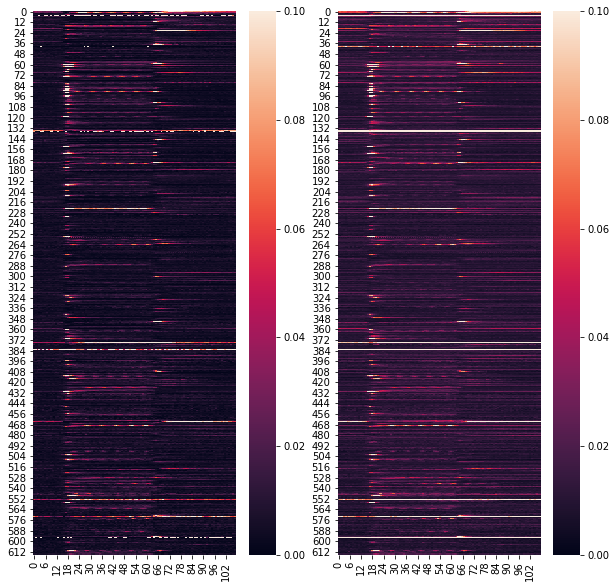

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(10, 10))
sns.heatmap(np.nanmean(test[0][:,:,:], axis=2), vmax=0.1, vmin=0, ax=axes[0])
sns.heatmap(np.nanmean(test2[0][:,:,:], axis=2), vmax=0.1, vmin=0, ax=axes[1])

In [44]:
plt.plot(np.nanmean(test2[0][:,:,:1000], axis=2).T);
# plt.ylim([-0.1, 1.6])

NameError: name 'test2' is not defined

In [66]:
test2[0].shape

(616, 108, 8466)

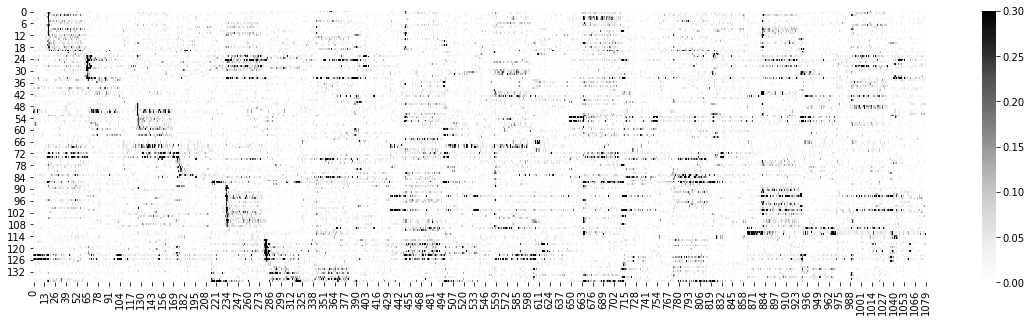

In [79]:
test_plot = test2[0][:,:,100:110]
test_plot = test_plot[~np.isnan(test_plot[:, 0, 0]), :, :]
test_plot = test_plot.transpose(2,0,1).reshape(test_plot.shape[0], -1)

test_sort = np.argsort(np.argmax(test_plot[:, :324], axis=1))

plt.figure(figsize=(20, 5))
sns.heatmap(test_plot[test_sort, :], vmax=0.3, cmap='Greys');

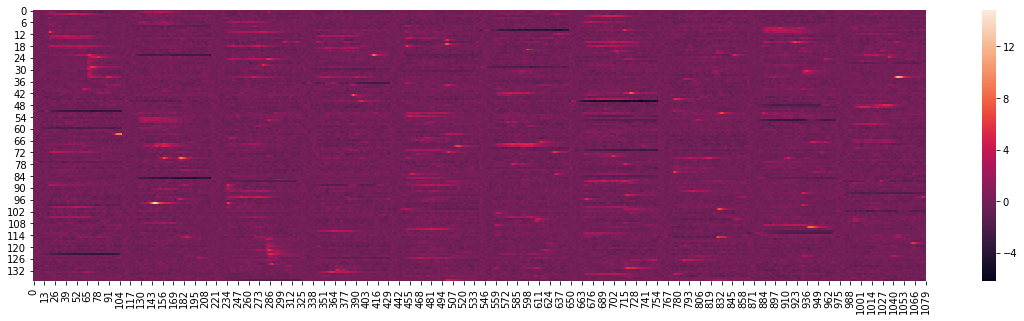

In [80]:
test_plot = test3[0][:,:,100:110]
test_plot = test_plot[~np.isnan(test_plot[:, 0, 0]), :, :]
test_plot = test_plot.transpose(2,0,1).reshape(test_plot.shape[0], -1)

# test_sort = np.argsort(np.argmax(test_plot[:, :324], axis=1))

plt.figure(figsize=(20, 5))
sns.heatmap(test_plot[test_sort, :]);

# adding in all behavior traces

In [1]:
# for mouse in ['CC175']:
# mouse = 'OA26'
import cascade as cas
import numpy as np
import pandas as pd
import os
import flow
for mouse in ['VF226']:  #['OA27', 'OA67', 'OA32', 'OA34', 'OA36', 'OA26', 'VF226']
    tags=None

    # TCA params
    rank=20
    method=('ncp_hals',)
    replicates=3
    fit_options=None
    negative_modes = [2]


    # grouping params
    group_by='all2'
    up_or_down='up'
    use_dprime=False
    dprime_threshold=2

    # tensor params
    trace_type='zscore_day'
    cs=''
    downsample=True
    start_time=-1
    end_time=6
    clean_artifacts=None
    thresh=20
    warp=False
    smooth=True
    smooth_win=6
    verbose=True

    # filtering params
    exclude_tags=('disengaged', 'orientation_mapping', 'contrast', 'retinotopy', 'sated')
    exclude_conds=('blank', 'blank_reward', 'pavlovian')
    driven=True
    drive_css=('0', '135', '270')
    drive_threshold=15
    nan_trial_threshold=0.85
    score_threshold=0.8

    # other params
    update_meta=False
    three_pt_tf=False
    remove_stim_corr=True

    # set grouping parameters
    if group_by.lower() == 'naive':
        tags = 'naive'
        use_dprime = False
        exclude_tags = ('disengaged', 'orientation_mapping', 'contrast',
                        'retinotopy', 'sated', 'learning_start')

    elif group_by.lower() == 'learning':
        use_dprime = False
        tags = 'learning'
        exclude_tags = ('disengaged', 'orientation_mapping', 'contrast',
                        'retinotopy', 'sated', 'learning_start',
                        'reversal1_start')

    elif group_by.lower() == 'naive_and_learning':
        use_dprime = False
        tags = ['naive', 'learning']
        days = flow.DateSorter.frommeta(
            mice=[mouse], tags='naive', exclude_tags=['bad'])
        days.extend(
            flow.DateSorter.frommeta(
                mice=[mouse], tags='learning', exclude_tags=['bad']))
        dates = [s.date for s in days]
        exclude_tags = ('disengaged', 'orientation_mapping', 'contrast',
                        'retinotopy', 'sated', 'learning_start',
                        'reversal1_start')

    elif group_by.lower() == 'high_dprime_learning':
        use_dprime = True
        up_or_down = 'up'
        tags = 'learning'
        exclude_tags = ('disengaged', 'orientation_mapping', 'contrast',
                        'retinotopy', 'sated', 'learning_start',
                        'reversal1_start')

    elif group_by.lower() == 'low_dprime_learning':
        use_dprime = True
        up_or_down = 'down'
        tags = 'learning'
        exclude_tags = ('disengaged', 'orientation_mapping', 'contrast',
                        'retinotopy', 'sated', 'learning_start')

    elif group_by.lower() == 'high_dprime_reversal1':
        use_dprime = True
        up_or_down = 'up'
        tags = 'reversal1'
        exclude_tags = ('disengaged', 'orientation_mapping', 'contrast',
                        'retinotopy', 'sated', 'reversal2_start')

    elif group_by.lower() == 'low_dprime_reversal1':
        use_dprime = True
        up_or_down = 'down'
        tags = 'reversal1'
        exclude_tags = ('disengaged', 'orientation_mapping', 'contrast',
                        'retinotopy', 'sated')

    elif group_by.lower() == 'high_dprime_reversal2':
        use_dprime = True
        up_or_down = 'up'
        tags = 'reversal2'
        exclude_tags = ('disengaged', 'orientation_mapping', 'contrast',
                        'retinotopy', 'sated')

    elif group_by.lower() == 'low_dprime_reversal2':
        use_dprime = True
        up_or_down = 'down'
        tags = 'reversal2'
        exclude_tags = ('disengaged', 'orientation_mapping', 'contrast',
                        'retinotopy', 'sated')

    elif group_by.lower() == 'naive_vs_high_dprime':
        use_dprime = True
        up_or_down = 'up'
        tags = None
        days = flow.DateSorter.frommeta(
            mice=[mouse], tags='naive', exclude_tags=['bad'])
        days.extend(
            flow.DateSorter.frommeta(
                mice=[mouse], tags='learning', exclude_tags=['bad']))
        dates = [s.date for s in days]
        exclude_tags = ('disengaged', 'orientation_mapping', 'contrast',
                        'retinotopy', 'sated', 'learning_start',
                        'reversal1_start')

    elif group_by.lower() == 'l_vs_r1':  # high dprime
        use_dprime = True
        up_or_down = 'up'
        tags = None
        days = flow.DateSorter.frommeta(
            mice=[mouse], tags='learning', exclude_tags=['bad'])
        days.extend(
            flow.DateSorter.frommeta(
                mice=[mouse], tags='reversal1', exclude_tags=['bad']))
        dates = [s.date for s in days]
        exclude_tags = ('disengaged', 'orientation_mapping', 'contrast',
                        'retinotopy', 'sated', 'learning_start',
                        'reversal1_start')

    elif group_by.lower() == 'all':
        tags = None
        use_dprime = False
        if mouse == 'OA27':
            exclude_tags = ('disengaged', 'orientation_mapping', 'contrast',
                            'retinotopy', 'sated', 'learning_start',
                            'reversal1_start', 'reversal2_start')
        else:
            exclude_tags = ('disengaged', 'orientation_mapping', 'contrast',
                            'retinotopy', 'sated')

    elif group_by.lower() == 'all2':
        tags = None
        use_dprime = False
        if mouse == 'OA27':
            exclude_tags = ('disengaged', 'orientation_mapping', 'contrast',
                            'retinotopy', 'sated', 'learning_start',
                            'reversal1_start', 'reversal2_start', 'reversal2')
        else:
            exclude_tags = ('disengaged', 'orientation_mapping', 'contrast',
                            'retinotopy', 'sated', 'reversal2_start', 'reversal2')


    else:
        print('Using input parameters without modification by group_by=...')

    # create folder structure and save dir
    if fit_options is None:
        fit_options = {'tol': 0.0001, 'max_iter': 500, 'verbose': False}
    pars = {'tags': tags, 'rank': rank, 'method': method,
            'replicates': replicates, 'fit_options': fit_options,
            'trace_type': trace_type, 'cs': cs, 'downsample': downsample,
            'start_time': start_time, 'end_time': end_time,
            'clean_artifacts': clean_artifacts, 'thresh': thresh,
            'warp': warp, 'smooth': smooth, 'smooth_win': smooth_win,
            'exclude_tags': exclude_tags, 'exclude_conds': exclude_conds,
            'driven': driven, 'drive_css': drive_css,
            'drive_threshold': drive_threshold}
    if three_pt_tf:
        pars['three_pt_trace'] = True
    if remove_stim_corr:
        pars['removed_stim_corr'] = True
    if len(negative_modes) > 0:
        pars['negative_modes'] = negative_modes,
    group_pars = {'group_by': group_by, 'up_or_down': up_or_down,
                  'use_dprime': use_dprime,
                  'dprime_threshold': dprime_threshold}
    save_dir = cas.paths.tca_path(mouse, 'group', pars=pars, group_pars=group_pars)

    # get DateSorter object
    if np.isin(group_by.lower(),
               ['naive_vs_high_dprime', 'l_vs_r1', 'naive_and_learning']):
        days = flow.DateSorter.frommeta(
            mice=[mouse], dates=dates, exclude_tags=['bad'])
    else:
        days = flow.DateSorter.frommeta(
            mice=[mouse], tags=tags, exclude_tags=['bad'])

    # filter DateSorter object if you are filtering on dprime
    if use_dprime:
        dprime = []
        for day1 in days:
            # for comparison with naive make sure dprime keeps naive days
            if np.isin('naive', day1.tags):
                if up_or_down.lower() == 'up':
                    dprime.append(np.inf)
                else:
                    dprime.append(-np.inf)
            else:
                dprime.append(pool.calc.performance.dprime(day1))
        if up_or_down.lower() == 'up':
            days = [d for c, d in enumerate(days) if dprime[c]
                    > dprime_threshold]
        elif up_or_down.lower() == 'down':
            days = [d for c, d in enumerate(days) if dprime[c]
                    <= dprime_threshold]

    # preallocate for looping over a group of days/runs
    meta_list = []
    tensor_list = []
    bhv_list = []
    id_list = []
    for c, day1 in enumerate(days, 0):

        # get cell_ids
        d1_ids = flow.xday._read_crossday_ids(day1.mouse, day1.date)
        # skip empty if there is no crossday alignment file
        if len(d1_ids) == 0:
            continue
        d1_ids = np.array([int(s) for s in d1_ids])

        # filter cells based on visual/trial drive across all cs, prevent
        # breaking when only pavs are shown
        if driven:
            good_ids = cas.tca._group_drive_ids(days, drive_css, drive_threshold)
            # filter for being able to check for quality of xday alignment
            if score_threshold > 0:
                orig_num_ids = len(good_ids)
                highscore_ids = cas.tca._group_ids_score(days, score_threshold)
                good_ids = np.intersect1d(good_ids, highscore_ids)
                if verbose and c == 0:
                    print('Cell score threshold ' + str(score_threshold) + ':'
                          + ' ' + str(len(highscore_ids)) + ' above threshold:'
                          + ' good_ids updated to ' + str(len(good_ids)) + '/'
                          + str(orig_num_ids) + ' cells.')
                # update saving tag
                score_tag = '_score0pt' + str(int(score_threshold*10))
            else:
                score_tag = ''
            d1_ids_bool = np.isin(d1_ids, good_ids)
            d1_sorter = np.argsort(d1_ids[d1_ids_bool])
        else:
            good_ids = d1_ids
            # filter for being able to check for quality of xday alignment
            if score_threshold > 0:
                orig_num_ids = len(good_ids)
                highscore_ids = cas.tca._group_ids_score(days, score_threshold)
                good_ids = np.intersect1d(good_ids, highscore_ids)
                if verbose and c == 0:
                    print('Cell score thresh ' + str(score_threshold) + ':'
                          + ' ' + str(len(highscore_ids)) + ' above thresh:'
                          + ' good_ids updated to ' + str(len(good_ids)) + '/'
                          + str(orig_num_ids) + ' cells.')
                # update saving tag
                score_tag = '_score0pt' + str(int(score_threshold*10))
            else:
                score_tag = ''
            d1_ids_bool = np.isin(d1_ids, good_ids)
            d1_sorter = np.argsort(d1_ids[d1_ids_bool])
        ids = d1_ids[d1_ids_bool][d1_sorter]

        # TODO add in additional filter for being able to check for quality of xday alignment

        # get all runs for both days
        d1_runs = day1.runs(exclude_tags=['bad'])

        # filter for only runs without certain tags
        d1_runs = [run for run in d1_runs if not
                   any(np.isin(run.tags, exclude_tags))]

        # build tensors for all correct runs and trials after filtering
        if d1_runs:
            d1_tensor_list = []
            d1_bhv_list = []
            d1_meta = []
            for run in d1_runs:
                t2p = run.trace2p()
                # trigger all trials around stimulus onsets
                run_traces = cas.utils.getcstraces(
                    run, cs=cs, trace_type=trace_type,
                    start_time=start_time, end_time=end_time,
                    downsample=downsample, clean_artifacts=clean_artifacts,
                    thresh=thresh, warp=warp, smooth=smooth,
                    smooth_win=smooth_win, exclude_tags=exclude_tags)
                bhv_traces = cas.tca._get_speed_pupil_traces(
                    run,
                    cs=cs,
                    start_time=start_time,
                    end_time=end_time,
                    downsample=downsample,
                    cutoff_before_lick_ms=-1)

                # filter and sort
                run_traces = run_traces[d1_ids_bool, :, :][d1_sorter, :, :]
                # get matched trial metadata/variables
                dfr = cas.tca._trialmetafromrun(run)
                # skip runs with no stimulus presentations
                if len(dfr) == 0:
                    continue
                # skip runs with only one type of stimulus presentation
                ori_to_match = np.unique(dfr['orientation'].values)
                ori_wo_blanks = len(ori_to_match) - np.sum(ori_to_match == -1)
                if cs == '' and ori_wo_blanks <= 2:
                    if verbose:
                        print('Skipping, only {} ori presented: '.format(ori_wo_blanks), run)
                    continue
                # subselect metadata if you are only running certain cs
                if cs != '':
                    if cs == 'plus' or cs == 'minus' or cs == 'neutral':
                        run_traces = run_traces[:, :, (~dfr['condition'].isin([cs]))]
                        bhv_traces = bhv_traces[:, :, (~dfr['condition'].isin([cs]))]
                        dfr = dfr.loc[(dfr['condition'].isin([cs])), :]
                    elif cs == '0' or cs == '135' or cs == '270':
                        run_traces = run_traces[:, :, (~dfr['orientation'].isin([cs]))]
                        bhv_traces = bhv_traces[:, :, (~dfr['orientation'].isin([cs]))]
                        dfr = dfr.loc[(dfr['orientation'].isin([cs])), :]
                    else:
                        print('ERROR: cs called - "' + cs + '" - is not\
                              a valid option.')

                # subselect metadata to remove certain conditions
                if len(exclude_conds) > 0:
                    run_traces = run_traces[:, :, (~dfr['condition'].isin(exclude_conds))]
                    bhv_traces = bhv_traces[:, :, (~dfr['condition'].isin(exclude_conds))]
                    dfr = dfr.loc[(~dfr['condition'].isin(exclude_conds)), :]

                # drop trials with nans and add to lists
                keep = np.sum(np.sum(np.isnan(run_traces), axis=0,
                              keepdims=True),
                              axis=1, keepdims=True).flatten() == 0
                dfr = dfr.iloc[keep, :]
                d1_tensor_list.append(run_traces[:, :, keep])
                d1_bhv_list.append(bhv_traces[:, :, keep])
                d1_meta.append(dfr)

            # if you did not add any runs for the day, continue
            if len(d1_tensor_list) == 0:
                continue

            # concatenate matched cells across trials 3rd dim (aka, 2)
            tensor = np.concatenate(d1_tensor_list, axis=2)

            # concatenate matched cells across trials 3rd dim (aka, 2)
            bhv_tensor = np.concatenate(d1_bhv_list, axis=2)

            # concatenate all trial metadata in pd dataframe
            meta = pd.concat(d1_meta, axis=0)

            meta_list.append(meta)
            tensor_list.append(tensor)
            bhv_list.append(bhv_tensor)
            id_list.append(ids)

    # get total trial number across all days/runs
    meta = pd.concat(meta_list, axis=0)
    trial_num = len(meta.reset_index()['trial_idx'])

    # get union of ids. Use these for indexing and splicing tensors together
    id_union = np.unique(np.concatenate(id_list, axis=0))
    cell_num = len(id_union)

    # build final behavior trace tensor
    group_bhv_tensor = np.concatenate(bhv_list, axis=2)

    # build a single large tensor leaving nans where cell is not found
    trial_start = 0
    trial_end = 0
    group_tensor = np.zeros((cell_num, np.shape(tensor_list[0])[1], trial_num))
    group_tensor[:] = np.nan
    for i in range(len(tensor_list)):
        trial_end += np.shape(tensor_list[i])[2]
        for c, k in enumerate(id_list[i]):
            celln_all_trials = tensor_list[i][c, :, :]
            group_tensor[(id_union == k), :, trial_start:trial_end] = celln_all_trials
        trial_start += np.shape(tensor_list[i])[2]

    # allow for cells with low number of trials to be dropped
    if nan_trial_threshold:
        # update saving tag
        nt_tag = '_nantrial' + str(nan_trial_threshold)
        # remove cells with too many nan trials
        ntrials = np.shape(group_tensor)[2]
        nbadtrials = np.sum(np.isnan(group_tensor[:, 0, :]), 1)
        badtrialratio = nbadtrials/ntrials
        badcell_indexer = badtrialratio < nan_trial_threshold
        group_tensor = group_tensor[badcell_indexer, :, :]
        if verbose:
            print('Removed ' + str(np.sum(~badcell_indexer)) +
                  ' cells from tensor:' + ' badtrialratio < ' +
                  str(nan_trial_threshold))
            print('Kept ' + str(np.sum(badcell_indexer)) +
                  ' cells from tensor:' + ' badtrialratio < ' +
                  str(nan_trial_threshold))
    else:
        nt_tag = ''

    # optionally remove stimulus correlations for each cell
    if remove_stim_corr:
        group_tensor = cas.tca._remove_stimulus_corr(group_tensor, meta)

    # optionally use the average across the baseline, stim, and post stim avg
    # to define a three pt temporal trace
    if three_pt_tf:
        group_tensor = cas.tca._three_point_temporal_trace(group_tensor, meta)

    # just so you have a clue how big the tensor is
    if verbose:
        print('Tensor decomp about to begin: tensor shape = '
              + str(np.shape(group_tensor)))

    # concatenate and save df for the day
    meta_path = os.path.join(
        save_dir, str(day1.mouse) + '_' + str(group_by) + score_tag + nt_tag +
        '_df_group_meta.pkl')
    input_tensor_path = os.path.join(
        save_dir, str(day1.mouse) + '_' + str(group_by) + score_tag + nt_tag +
        '_group_tensor_' + str(trace_type) + '.npy')
    input_bhv_path = os.path.join(
        save_dir, str(day1.mouse) + '_' + str(group_by) + score_tag + nt_tag +
        '_group_bhv_' + str(trace_type) + '.npy')
    input_ids_path = os.path.join(
        save_dir, str(day1.mouse) + '_' + str(group_by) + score_tag + nt_tag +
        '_group_ids_' + str(trace_type) + '.npy')
    output_tensor_path = os.path.join(
        save_dir, str(day1.mouse) + '_' + str(group_by) + score_tag + nt_tag +
        '_group_decomp_' + str(trace_type) + '.npy')
    # meta.to_pickle(meta_path)
    # np.save(input_tensor_path, group_tensor)
    # np.save(input_ids_path, id_union)
    np.save(input_bhv_path, group_bhv_tensor)

TCA parameters hashed: pharmacology
Cell score threshold 0.8: 623 above threshold: good_ids updated to 400/483 cells.
Skipping, only 1 ori presented:  VF226_180213_3
Skipping, only 1 ori presented:  VF226_180213_4
Skipping, only 1 ori presented:  VF226_180213_5
Skipping, only 1 ori presented:  VF226_180213_6
Skipping, only 1 ori presented:  VF226_180215_1
Skipping, only 1 ori presented:  VF226_180215_2
Skipping, only 1 ori presented:  VF226_180221_1


s:\twophoton_analysis\code\flow\flow\trace2p.py:638: RuntimeWarning: Mean of empty slice
  errortrials=errortrials, baseline=None), axis=1)
s:\twophoton_analysis\code\cascade\cascade\tca.py:2022: RuntimeWarning: Mean of empty slice
  pre_pupil.append(np.nanmean(pre_pupil_vec[nbefore:nafter]))
s:\twophoton_analysis\code\cascade\cascade\tca.py:2046: RuntimeWarning: Mean of empty slice
  pupil.append(np.nanmean(pupil_vec[nbefore:nafter]))


Removed 177 cells from tensor: badtrialratio < 0.85
Kept 223 cells from tensor: badtrialratio < 0.85
Tensor decomp about to begin: tensor shape = (223, 108, 12813)


In [ ]:
debug

# older stuff 

In [ ]:
mice = ['CC175', 'OA32', 'OA34', 'OA36', 'OA27', 'OA26', 'OA67', 'VF226'] # ['OA32', 'OA34', 'CC175', 'OA36']
for m in mice:
#     ms = flow.Mouse(m)
#     if m == 'OA27':
#         w = 'restaurant'
#     else:
#          w = 'whale'
#     cas.tca.groupday_tca(m, update_meta=True, smooth_win=10)
    cas.tca.groupday_tca(m, update_meta=True, smooth_win=6)
    cas.tca.groupday_tca(m, update_meta=True, score_threshold=0, smooth_win=6)

In [12]:
run = flow.Mouse(mouse='OA27').runs()
testrun = run[10]
# for c, ri in enumerate(run):
#     if 'pupil' in ri.trace2p().d.keys():
#         print(c)
t2p = testrun.trace2p()
# cas.tca._trialmetafromrun()

In [57]:
pre_pupil_vec = t2p.d['pupil']
pre_pupil_vec = pre_pupil_vec.astype('float')
# account for fact that pupillometry is always at 15 Hz
# divide onsets and offsets by 2 if the framerate is 30Hz
if t2p.d['framerate'] > 30:
    nframe_back = np.round(t2p.d['framerate']/2)
    div = 2  # divisor for onsets and offsets
else:
    nframe_back = np.round(t2p.d['framerate'])
    div = 1
pre_pupil = []

In [ ]:
# calculate running speed preceding trial
if t2p.d['running'].size > 0:
    pre_speed_vec = t2p.speed()
    pre_speed_vec = pre_speed_vec.astype('float')
    nframe_back = np.round(t2p.d['framerate'])
    pre_speed = []
    for s in trial_idx:
#         try:
        pre_speed.append(
                np.nanmean(
                    pre_speed_vec[int(all_onsets[s] - nframe_back):all_onsets[s]]))
        print('made it')
#         except:
#             pre_speed.append(np.nan)
    pre_speed = np.array(pre_speed)
else:
    pre_speed = np.full(len(trial_idx), np.nan)

In [74]:
all_onsets[s]

229

In [76]:
# calculate running speed during trial
if t2p.d['running'].size > 0:
    speed_vec = t2p.speed()
    speed_vec = speed_vec.astype('float')
    speed = []
    for s in trial_idx:
        try:
            speed.append(
                np.nanmean(
                    speed_vec[all_onsets[s]:all_offsets[s]]))
        except:
            speed.append(np.nan)
    speed = np.array(speed)
else:
    speed = np.full(len(trial_idx), np.nan)

# calculate running speed preceding trial
if t2p.d['running'].size > 0:
    pre_speed_vec = t2p.speed()
    pre_speed_vec = pre_speed_vec.astype('float')
    nframe_back = np.round(t2p.d['framerate'])
    pre_speed = []
    for s in trial_idx:
        try:
            pre_speed.append(
                np.nanmean(
                    pre_speed_vec[int(all_onsets[s] - nframe_back):all_onsets[s]]))
        except:
            pre_speed.append(np.nan)
    pre_speed = np.array(pre_speed)
else:
    pre_speed = np.full(len(trial_idx), np.nan)

# get mean brainmotion for time stim is on screen
# use first 3 seconds after onset if there is no offset
if t2p.d['brainmotion'].size > 0:
    xy_vec = t2p.d['brainmotion']
    xy_vec = xy_vec.astype('float')
    brainmotion = []
    for s in trial_idx:
        try:
            brainmotion.append(np.nanmean(xy_vec[all_onsets[s]:all_offsets[s]]))
        except:
            brainmotion.append(np.nan)
    brainmotion = np.array(speed)
else:
    brainmotion = np.full(len(trial_idx), np.nan)

# count anticipatory licks during stimulus presentation
if 'licking' in t2p.d.keys() and (t2p.d['licking'].size > 0):
    lick_vec = t2p.d['licking']
    lick_vec = lick_vec.astype('float')
    antic_lick = []
    for s in trial_idx:
        try:
            lick_bool = (lick_vec > all_onsets[s]) & \
                        (lick_vec < all_offsets[s])
            antic_lick.append(np.sum(lick_bool))
        except:
            antic_lick.append(np.nan)
    antic_lick = np.array(antic_lick)
else:
    antic_lick = np.full(len(trial_idx), np.nan)

# count licks 1 second before stimulus presentation
if 'licking' in t2p.d.keys() and (t2p.d['licking'].size > 0):
    pre_lick_vec = t2p.d['licking']
    pre_lick_vec = pre_lick_vec.astype('float')
    nframe_back = np.round(t2p.d['framerate'])
    pre_lick = []
    for s in trial_idx:
        try:
            pre_lick_bool = (lick_vec < all_onsets[s]) & \
                            (lick_vec > (all_onsets[s] - nframe_back))
            pre_lick.append(np.sum(pre_lick_bool))
        except:
            pre_lick.append(np.nan)
    pre_lick = np.array(pre_lick)
else:
    pre_lick = np.full(len(trial_idx), np.nan)

# calculate pupil diameter preceding trial
if 'pupil' in t2p.d.keys() and (t2p.d['pupil'].size > 0):
    pre_pupil_vec = t2p.d['pupil']
    pre_pupil_vec = pre_pupil_vec.astype('float')
    # account for fact that pupillometry is always at 15 Hz
    # divide onsets and offsets by 2 if the framerate is 30Hz
    if t2p.d['framerate'] > 30:
        nframe_back = np.round(t2p.d['framerate']/2)
        div = 2  # divisor for onsets and offsets
    else:
        nframe_back = np.round(t2p.d['framerate'])
        div = 1
    pre_pupil = []
    for s in trial_idx:
        try:
            nbefore = int(np.round(all_onsets[s]/div) - nframe_back)
            nafter = int(np.round(all_onsets[s]/div))
            pre_pupil.append(np.nanmean(pre_pupil_vec[nbefore:nafter]))
        except:
            pre_pupil.append(np.nan)
    pre_pupil = np.array(pre_pupil)
else:
    pre_pupil = np.full(len(trial_idx), np.nan)

# calculate pupil diameter during stimulus presentation
if 'pupil' in t2p.d.keys() and (t2p.d['pupil'].size > 0):
    pupil_vec = t2p.d['pupil']
    pupil_vec = pupil_vec.astype('float')
    # account for fact that pupillometry is always at 15 Hz
    # divide onsets and offsets by 2 if the framerate is 30Hz
    if t2p.d['framerate'] > 30:
        nframe_back = np.round(t2p.d['framerate']/2)
        div = 2  # divisor for onsets and offsets
    else:
        nframe_back = np.round(t2p.d['framerate'])
        div = 1
    pupil = []
    for s in trial_idx:
        try:
            nbefore = int(np.round(all_onsets[s]/div))
            nafter = int(np.round(all_offsets[s]/div))
            pupil.append(np.nanmean(pupil_vec[nbefore:nafter]))
        except:
            pupil.append(np.nan)
    pupil = np.array(pupil)
else:
    pupil = np.full(len(trial_idx), np.nan)

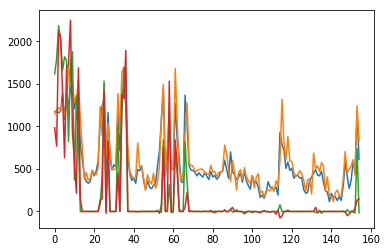

In [83]:
plt.plot(pupil)
plt.plot(pre_pupil)
plt.plot(speed*100)
plt.plot(pre_speed*100)

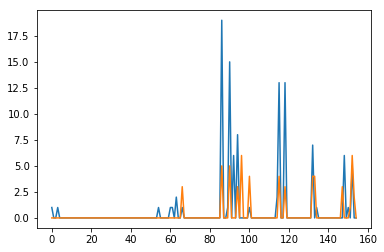

In [86]:
plt.plot(antic_lick)
plt.plot(pre_lick)

In [44]:
np.sum([True, True])
nframe_back = np.round(t2p.d['framerate'])
nframe_back
ntrials = t2p.ntrials
trial_idx = range(ntrials)
len(trial_idx)

155

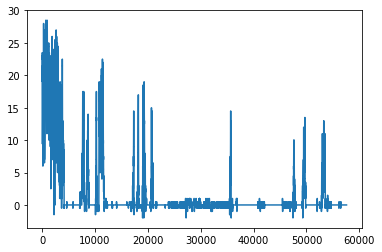

In [39]:
plt.plot(t2p.speed())

In [29]:
# plt.plot(t2p.d['running'])
# plt.plot(t2p.d['running'])
print(len(t2p.d['running']), len(t2p.speed()))

57600 57600


In [ ]:
cas.plotting.tca.groupday_shortlist('CC175', group_by='all', word='whale', score_threshold=0.8)
cas.plotting.tca.groupday_shortlist('OA36', group_by='all', word='whale', score_threshold=0.8)

In [ ]:
cas.plotting.tca.groupday_shortlist('VF226', group_by='all', word='whale', score_threshold=0.8)

In [ ]:
mice = ['OA32', 'OA34', 'OA36', 'OA27', 'OA26', 'OA67', 'VF226'] # ['OA32', 'OA34', 'CC175', 'OA36']
for m in mice:
    ms = flow.Mouse(m)
    if m == 'OA27':
        w = 'orlando'
    else:
         w = 'already'
#     cas.calc.var.groupday_varex_byday_bycomp(ms, word=w)
    cas.calc.var.groupday_var_byday(ms, word=w)

In [5]:
mice = ['OA27', 'OA26', 'OA32', 'OA34', 'OA36', 'OA67', 'VF226'] # ['OA32', 'OA34', 'CC175', 'OA36']
for m in mice:
    ms = flow.Mouse(m)
    if m == 'OA27':
        w = 'directors'
    else:
         w = 'appeared'
#     cas.calc.var.groupday_varex_byday_bycomp_bycell(ms, word=w)
    cas.calc.var.groupday_varex(ms, word=w, rectified=False)

In [23]:
# cas.calc.var.groupday_varex(flow.Mouse('OA27'), word='determine', rectified=False)
# cas.calc.var.groupday_varex_bycomp(flow.Mouse('OA27'), word='determine', rectified=False)
mice = ['OA27', 'OA26', 'OA32', 'OA34', 'OA36', 'OA67', 'VF226'] # ['OA32', 'OA34', 'CC175', 'OA36']
for m in mice:
    ms = flow.Mouse(m)
    if m == 'OA27':
        w = 'bookmarks'
    else:
         w = 'horrible'
#     cas.calc.var.groupday_varex_bycomp(ms, nan_thresh=0.95, word=w, group_by='all3', rectified=True)
#     cas.calc.var.groupday_varex_byday(ms, nan_thresh=0.95, word=w, group_by='all3', rectified=True)
    cas.calc.var.groupday_var_byday(ms, nan_thresh=0.95, word=w, group_by='all3', rectified=True)
#     cas.calc.var.groupday_varex_byday_bycomp(ms, nan_thresh=0.95, word=w, group_by='all3', rectified=True)
#     cas.calc.var.groupday_varex(ms, nan_thresh=0.95, word=w, group_by='all3', rectified=True)

Recalcing cascade.calc.var.groupday_varex_bycomp: OA27  


KeyboardInterrupt: 

In [8]:
df = cas.calc.var.groupday_varex_byday_bycomp(flow.Mouse('OA27'), word='orlando')
date_vec = deepcopy(df['date'].values)
uni_dates = np.unique(date_vec)
for c, day in enumerate(uni_dates):
    date_vec[date_vec == day] = c
df['day_num'] = date_vec
sns.relplot(x='day_num', y='variance_explained_tcamodel', data=df, col='rank', hue='component', kind='line', palette=sns.husl_palette(20), row='component')